بِسْمِ اللهِ الرَّحْمَنِ الرَّحِيْمِ

# Graded Challenge 4 Phase 1
# Credit Card Customer Segmentation

Ahmad Luay Adnani, Batch: FTDS - 018 RMT

---

# i. Introduction
> This section contains the background analysis, problem statements and conceptual problems.

## Background


Customers behaviour is necessary to be analyzed in order to improve the performance of a business. It enables a business to provide solutions for customers needs as products or services, and the business can be various since innovations of business will keep growing as the competition is also tighter.

Not only the growing number of competition of business that keeps growing, the development of technology and information will create the situation of customers behaviour will grow in any modern business. The leverage of the data to maximize decision is important to do for a big business, such as banks, to make an effective business and marketing strategy in the future.

This case also happens in bank by selling their products and services such as credit cards. A credit card is a type of credit facility, provided by banks that allow customers to borrow funds within a pre-approved credit limit. It enables customers to make purchase transactions on goods and services.

## Problem Statements


Thus, the activity of credit card usage is important to keep the business keep growing and alive. From this analysis, the customers segmentation will be applied as we should understand about credit card customers behaviours. From here, the question raised is: **what kind of customers that have been actively using credit cards in the last 6 months?**

---

# ii. Query SQL
> This section contains SQL queries from Google Cloud Platform that were used in the data analysis.

```
SELECT *
FROM `ftds-hacktiv8-project.phase1_ftds_018_rmt.credit-card-information`
WHERE mod(CUST_ID,2) = 0
ORDER BY CUST_ID
```

---

# iii. Importing Libraries
> This section contains the process of importing libraries and checking the version of the libraries that will be used in this analysis.

## Import Libraries

This section explains how to import the libraries that will be used in the analysis. The main library used for this analysis will be scikit-learn. In addition to scikit-learn, the libraries used in this analysis include `pandas`, `numpy`, `matplotlib`, and `seaborn`.

In [148]:
# Importing Libraries
import numpy as np
import pandas as pd
import sklearn

import warnings
warnings.filterwarnings('ignore')

# Data visualization libraries
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from matplotlib.ticker import FixedLocator, FixedFormatter

# handling outliers
from feature_engine.outliers import Winsorizer

# Scaling and Encoding
from sklearn.preprocessing import MinMaxScaler

# Spectral Clustering
from sklearn.cluster import SpectralClustering 

#PCA
from sklearn.decomposition import PCA

# Kmeans
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

# AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Save and Load Model
import pickle
import json

## Libraries Version

This section explains how to check the version of the libraries that will be used in the analysis.

In [149]:
# library version
print('pandas version :',(pd.__version__))
print('numpy version :',(np.__version__))
print('matplotlib version :',(matplotlib.__version__))
print('seaborn version :',(sns.__version__))
print('scikit-learn version :',(sklearn.__version__))

pandas version : 1.5.3
numpy version : 1.24.1
matplotlib version : 3.6.3
seaborn version : 0.12.2
scikit-learn version : 1.2.1


---

# iv. Data Loading
> This section explains the data preparation process prior to further data exploration. The data preparation process carried out in this section includes the process of data loading, checking the size of the dataset, displaying information of the dataset, checking for missing values, checking for duplicated entries, and measuring of central tendency.

## Data Loading

This section explains the process of data loading. Dataset used in this analysis is `credit-card-information` from Google Cloud Platform database.

In [150]:
# Data Loading
df= pd.read_csv('h8dsft_P1G4_Ahmad_Luay_Adnani.csv')
# Displaying the top 10 rows of the dataset
df.head(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0        2  4613.570499           1.000000       0.00              0.00   
1        4  2583.247881           1.000000    1337.35             45.65   
2        6  1597.911395           1.000000       0.00              0.00   
3        8  3506.489102           1.000000       0.00              0.00   
4       10  2306.310095           1.000000     359.96              0.00   
5       12   101.682988           1.000000     610.34             86.00   
6       14  3215.903805           1.000000     745.48              0.00   
7       16   966.251742           1.000000     311.45            311.45   
8       18  2306.698723           0.727273   12784.51          11246.07   
9       20  2610.433432           1.000000     512.50              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    0.00   1728.341939             0.000000   
1                 1291.70   2484.594650             1.000000   
2                    0.00    162.919727             0.000000   
3                    0.00   4467.382055             0.000000   
4                  359.96   2843.482435             0.916667   
5                  524.34      0.000000             1.000000   
6                  745.48      0.000000             1.000000   
7                    0.00    955.959749             0.333333   
8                 1538.44    191.652876             0.666667   
9                  512.50   2771.850961             1.000000   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.000000   
1                    0.083333                          1.000000   
2                    0.000000                          0.000000   
3                    0.000000                          0.000000   
4                    0.000000                          0.916667   
5                    0.166667                          1.000000   
6                    0.000000                          1.000000   
7                    0.333333                          0.000000   
8                    0.666667                          0.333333   
9                    0.000000                          0.857143   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.090909                 1              0        6000.0   
1                0.500000                18             21        3000.0   
2                0.250000                 3              0        1800.0   
3                1.000000                11              0        5000.0   
4                0.333333                 6             11        4000.0   
5                0.000000                 0             40        1500.0   
6                0.000000                 0             35        2500.0   
7                0.083333                 1             15        1500.0   
8                0.083333                 1             68        6200.0   
9                0.142857                 6             11        3000.0   

       PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0    922.218961       1460.635220          0.000000      11  
1    819.792196       6404.855484          0.000000      12  
2    548.420841        416.956325          0.000000      12  
3    286.708354        628.484562          0.000000       6  
4   1482.816136       2056.434829          0.000000      12  
5    324.924223        152.877812          0.090909      12  
6      0.000000               NaN          0.000000      12  
7    277.522439        286.299328          0.000000      12  
8  13705.004410       1310.291574          0.000000      12  
9    691.600531        741.985756          0.000000       7

In [151]:
# Displaying the bottom 10 rows of the dataset
df.tail(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
4465     8932  1133.652007           1.000000      34.83             34.83   
4466     8934    10.160744           0.636364      82.04              0.00   
4467     8936  1368.995070           1.000000     521.31            140.00   
4468     8938   202.080470           1.000000     190.96              0.00   
4469     8940    80.363442           0.909091    2370.44             47.50   
4470     8942    83.477053           0.181818       0.00              0.00   
4471     8944     8.404256           0.857143       0.00              0.00   
4472     8946  4211.539631           1.000000       0.00              0.00   
4473     8948   111.539712           1.000000    1364.86              0.00   
4474     8950   294.280019           1.000000      19.90             19.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
4465                    0.00      0.000000             0.166667   
4466                   82.04      0.000000             0.500000   
4467                  381.31      0.000000             1.000000   
4468                  190.96      0.000000             0.250000   
4469                 2322.94      0.000000             1.000000   
4470                    0.00   2654.856157             0.000000   
4471                    0.00    132.266653             0.000000   
4472                    0.00    455.581546             0.000000   
4473                 1364.86      0.000000             0.916667   
4474                    0.00     75.255164             0.083333   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
4465                    0.166667                          0.000000   
4466                    0.000000                          0.500000   
4467                    0.083333                          1.000000   
4468                    0.000000                          0.250000   
4469                    0.083333                          1.000000   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.000000                          0.000000   
4473                    0.000000                          0.833333   
4474                    0.083333                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
4465                0.000000                 0              2        1200.0   
4466                0.000000                 0              6        2000.0   
4467                0.000000                 0             20        3000.0   
4468                0.000000                 0              3        1000.0   
4469                0.000000                 0             63        1500.0   
4470                0.083333                 2              0        3000.0   
4471                0.285714                 3              0        2500.0   
4472                0.083333                 1              0       10500.0   
4473                0.000000                 0             11        4000.0   
4474                0.166667                 2              1        1000.0   

          PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
4465    309.340005        279.044103          0.000000      12  
4466    139.914571        153.668941          0.000000      12  
4467    616.095965        467.239217          0.000000      12  
4468    156.408373        173.016455          0.083333      12  
4469   2373.359220        141.350236          0.818182      12  
4470  12902.188130       1791.729021          0.500000      12  
4471    206.851966         24.421074          0.250000       7  
4472   1288.287239       1164.178674          0.000000      12  
4473   1500.447193        150.868096          0.200000      12  
4474    214.638861        174.577973          0.000000      12

Following are the variables and definitions of each column in the dataset.

Variable | Definition
---|---
`CUST_ID` | Identification of Credit Card holder (Categorical)
`BALANCE` | Balance amount left in their account to make purchases
`BALANCE_FREQUENCY  ` | How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
`PURCHASES` | Amount of purchases made from account
`ONEOFF_PURCHASES` | Maximum purchase amount done in one-go
`INSTALLMENTS_PURCHASES` | Amount of purchase done in installment
`CASH_ADVANCE` | Cash in advance given by the holder
`PURCHASES_FREQUENCY` | How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
`ONEOFF_PURCHASES_FREQUENCY` | How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
`PURCHASES_INSTALLMENTS_FREQUENCY` | How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
`CASH_ADVANCE_FREQUENCY` | How frequently the cash in advance being paid
`CASH_ADVANCE_TRX` | Number of Transactions made with "Cash in Advanced"
`PURCHASES_TRX` | Number of purchase transactions made
`CREDIT_LIMIT` | Limit of Credit Card for holder
`PAYMENTS` | Amount of Payment done by holder
`MINIMUM_PAYMENTS` | Minimum amount of payments made by holder
`PRC_FULL_PAYMENT` | Percent of full payment paid by holder
`TENURE` | Tenure of credit card service for holder

## Size of Dataset
This section explains how to check the size of the dataset.

In [152]:
# size of dataset
df.shape

(4475, 18)

## Information
This section explains the information contained in the dataset, including the index, columns, data type, non-null values, and memory usage.

In [153]:
# showing information from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

In [154]:
# Converting Dtype
df = df.astype({'CUST_ID': 'object','CASH_ADVANCE_TRX':'float','PURCHASES_TRX':'float','TENURE':'float'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   object 
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   float64
 12  PURCHA

## Missing Values
This section explains the process for checking missing values.

In [155]:
# check for missing value
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    158
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

There are 159 missing values in this dataset.

## Checking for Duplicated Data
This section explains the process to check for duplicated data in the dataset.

In [156]:
# Check for duplicated entries
df.duplicated().value_counts()

False    4475
dtype: int64

There is no duplicated data in this dataset.

## Measure of Central Tendency
Following are the measure of central tendency of the dataset used in this analysis.

In [157]:
# measure of central tendency
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   4475.000000        4475.000000   4475.000000       4475.000000   
mean    1565.743939           0.877608   1003.158324        588.504849   
std     2091.205727           0.235604   2210.812899       1666.500287   
min        0.000000           0.000000      0.000000          0.000000   
25%      132.536353           0.888889     40.065000          0.000000   
50%      874.905296           1.000000    362.480000         29.990000   
75%     2058.519163           1.000000   1122.640000        580.320000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             4475.000000   4475.000000          4475.000000   
mean               415.025075    973.453671             0.490122   
std                927.360842   2133.464502             0.399874   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.450000      0.000000             0.500000   
75%                484.255000   1098.569962             0.916667   
max              22500.000000  29282.109150             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 4475.000000                       4475.000000   
mean                     0.202614                          0.364989   
std                      0.298502                          0.397336   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.333333                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             4475.000000       4475.000000    4475.000000   4474.000000   
mean                 0.134156          3.196425      14.490503   4494.020175   
std                  0.199221          6.500169      24.156038   3668.535689   
min                  0.000000          0.000000       0.000000    150.000000   
25%                  0.000000          0.000000       1.000000   1500.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.181818          4.000000      17.000000   6000.000000   
max                  1.166667        110.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   4475.000000       4317.000000       4475.000000  4475.000000  
mean    1726.212274        854.429538          0.157206    11.516425  
std     2961.258570       2306.411178          0.295869     1.347819  
min        0.000000          0.037744          0.000000     6.000000  
25%      390.206371        169.814310          0.000000    12.000000  
50%      831.048408        309.854995          0.000000    12.000000  
75%     1895.959003        830.395060          0.166667    12.000000  
max    46930.598240      61031.618600          1.000000    12.000000

--- 

# v. Exploratory Data Analysis
> This section contains data exploration of the dataset used in this analysis. 

## Balance vs Purchase

This section describes data exploration to find out the relationship between `balance` and `purchase`.

Text(0.5, 1.0, 'Balance vs Cash Advance')

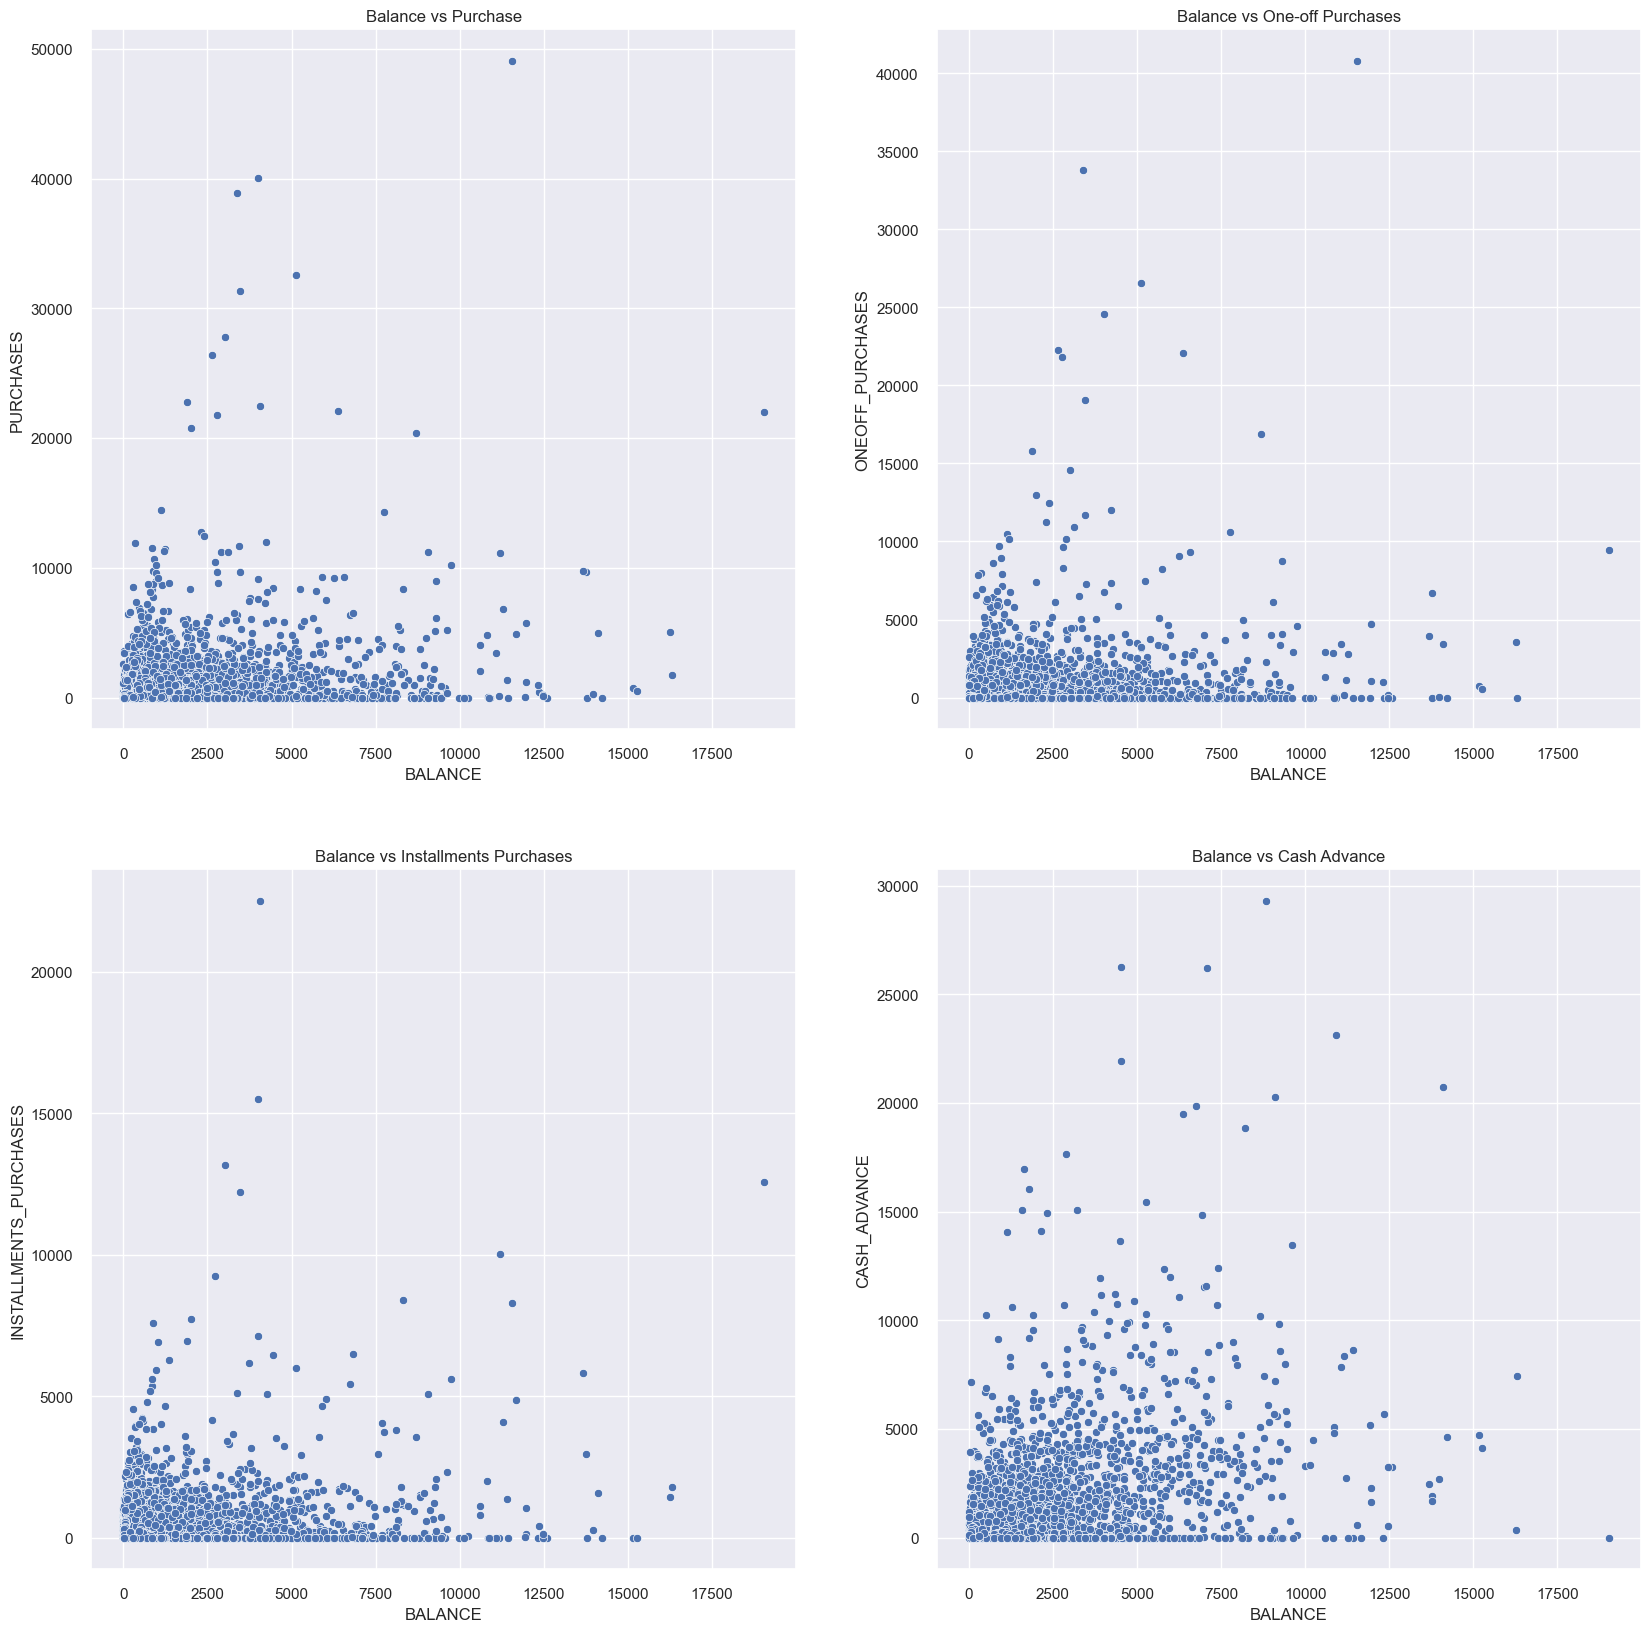

In [158]:
# Create Scatter Plots
sns.set(font_scale=1)
fig, ax = plt.subplots(2,2,figsize=(20,20))
sns.scatterplot(ax=ax[0,0],data=df,x='BALANCE',y='PURCHASES')
ax[0,0].set_title('Balance vs Purchase')
sns.scatterplot(ax=ax[0,1],data=df,x='BALANCE',y='ONEOFF_PURCHASES')
ax[0,1].set_title('Balance vs One-off Purchases')
sns.scatterplot(ax=ax[1,0],data=df,x='BALANCE',y='INSTALLMENTS_PURCHASES')
ax[1,0].set_title('Balance vs Installments Purchases')
sns.scatterplot(ax=ax[1,1],data=df,x='BALANCE',y='CASH_ADVANCE')
ax[1,1].set_title('Balance vs Cash Advance')

From the visualization above, the balance left and purchases are stacking at the bottom left of the axes. Based on my assumptions, As the credit **balance** is low, there are fewer **one-off purchases** and **installment purchases** being made.

Apparently one plot shows slightly different than the others, which is Balance-Cash Advance and its distribution looks less stacked than others. Based on my assumptions, making a __payment using cash advance does not result in a quick decrease in the credit balance__.

## Tenure

This section describes data exploration to find out `tenure` of credit card service for holder.

In [159]:
# TENURE value counts
df.TENURE.value_counts().to_frame()

TENURE
12.0    3807
11.0     166
10.0     114
6.0      103
7.0      100
8.0       97
9.0       88

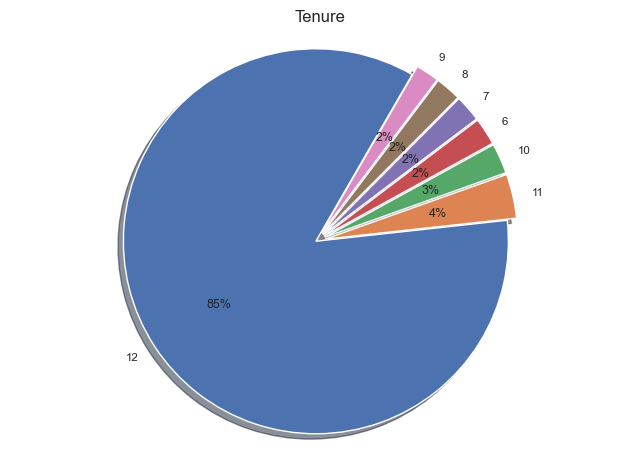

In [160]:
#create pie chart
sns.set(font_scale=0.75)
labels = '12', '11', '10', '6', '7', '8', '9'
colors = sns.color_palette('deep')
explode = (0,0.05,0.05,0.05,0.05,0.05,0.05)

plt.pie(df.TENURE.value_counts(),labels=labels,explode=explode, colors = colors, autopct='%.0f%%',shadow=True,startangle=60)

sns.set(font_scale=1)
plt.axis('equal')
plt.title('Tenure')
plt.show()

From the visualization above, We can see that apparently most credit card holders have a tenure of 12 months. Based on my opinion, most people plan to use credit cards in the long term.

## Histogram

This section contains data exploration to find out the shape of the data distribution of each column in the dataset.

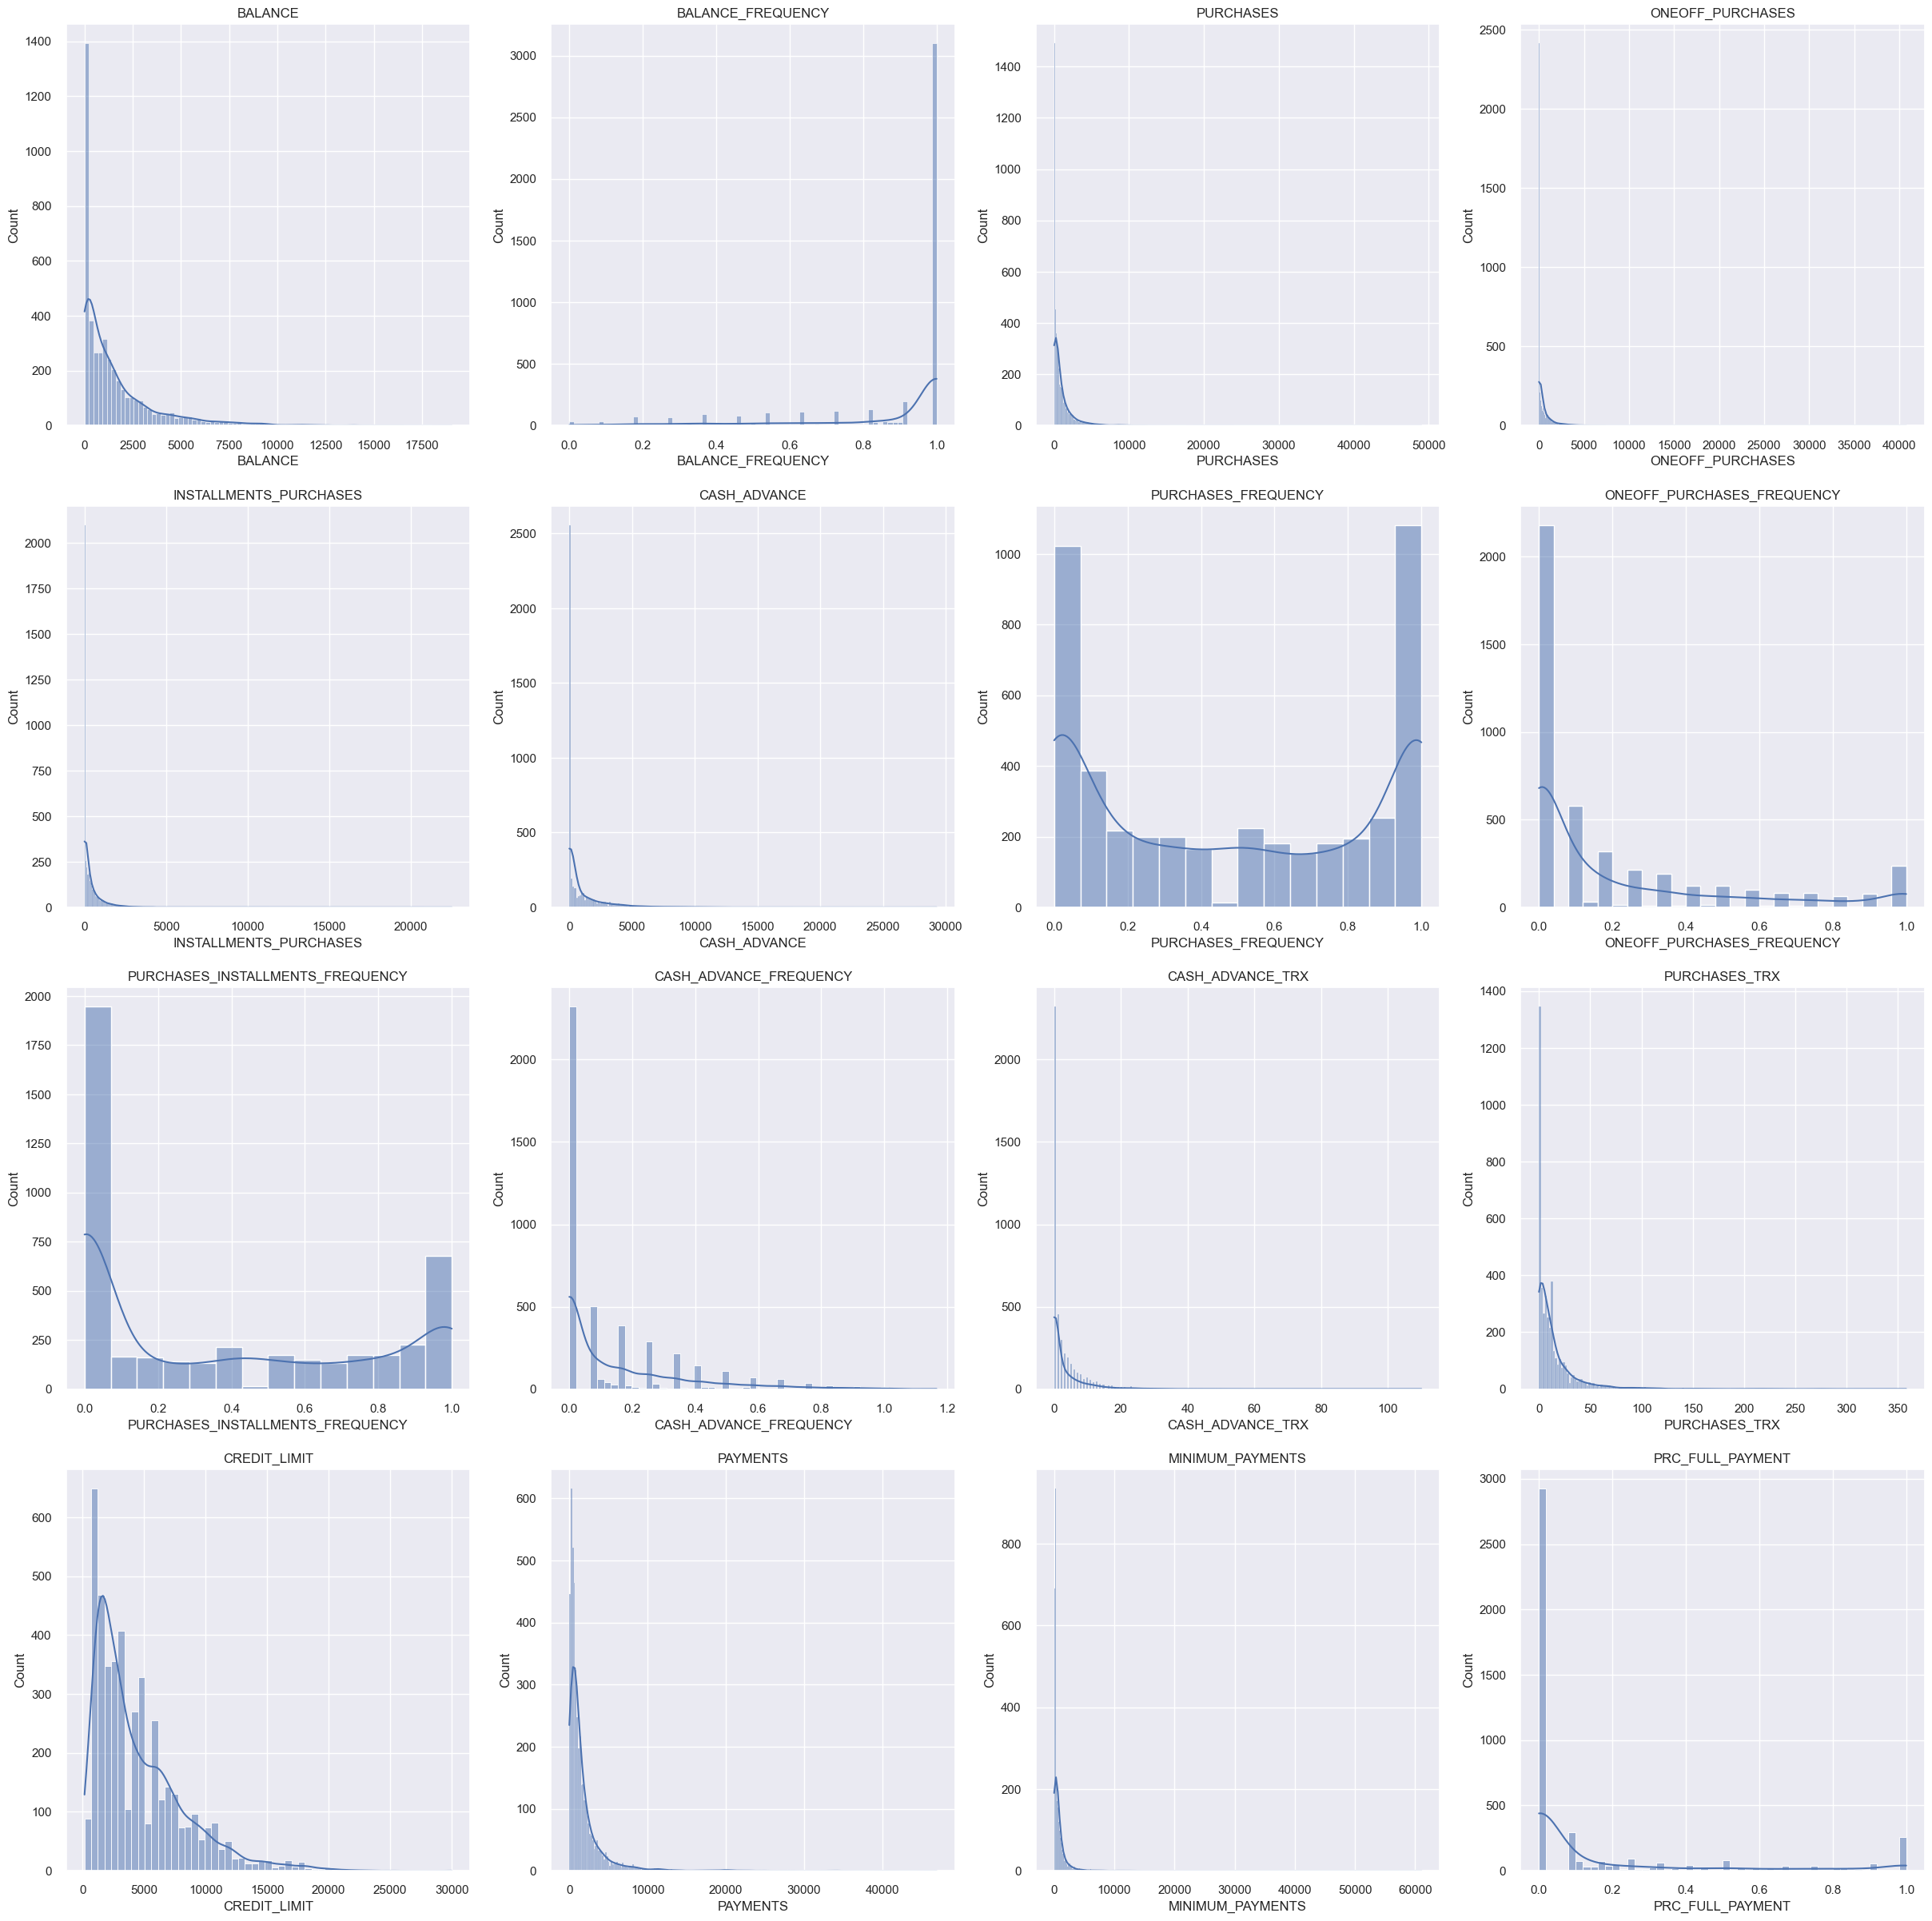

In [161]:
hist = df.drop(['CUST_ID','TENURE'],axis=1)
# Histogram Visualizations
plt.figure(figsize=(30, 30))
n=len(hist.columns)
sns.set(font_scale=1)
for i in range(n):
    plt.subplot(4,4,i+1)
    col = hist.columns[i]
    sns.histplot(data=hist[col],kde=True)
    plt.title(f'{col}')

The visualization above show that the data distribution of most of the data is right-skewed.

---

# vi. Feature Engineering
> This section explains the process of preparing data for the model training process, such as data cleaning, creating data inference, data transformation (normalization, encoding, etc.), and other processes needed.

## Data Inference

This section explains how to create a data inference.

In [162]:
# Creating data inference
data = df.copy()
df_inf = data.sample(10, random_state=0).sort_index()
print('size of data inference (rows,columns) : ',df_inf.shape)
df_inf.reset_index(drop=True).head(10)

size of data inference (rows,columns) :  (10, 18)


CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     438  3355.631092           1.000000     242.88              0.00   
1     442    38.916240           1.000000     358.49              0.00   
2    1746  3092.948987           1.000000    1132.03           1038.75   
3    2952     1.533981           0.545455     141.56              0.00   
4    3090  1562.633343           1.000000    1330.62           1169.63   
5    3746   475.826042           1.000000     950.00            950.00   
6    5108   751.224820           1.000000    1000.00              0.00   
7    5118    55.147722           0.875000     163.31              0.00   
8    5854  2932.111796           1.000000     346.32            346.32   
9    8086   101.936878           1.000000     888.96              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                  242.88      0.000000             1.000000   
1                  358.49    188.234434             0.916667   
2                   93.28   3988.939447             0.833333   
3                  141.56      0.000000             0.500000   
4                  160.99      0.000000             0.500000   
5                    0.00      0.000000             0.083333   
6                 1000.00      0.000000             0.416667   
7                  163.31      0.000000             0.875000   
8                    0.00   2631.304016             0.333333   
9                  888.96      0.000000             1.000000   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          1.000000   
1                    0.000000                          0.833333   
2                    0.250000                          0.583333   
3                    0.000000                          0.500000   
4                    0.166667                          0.250000   
5                    0.083333                          0.000000   
6                    0.000000                          0.333333   
7                    0.000000                          0.750000   
8                    0.333333                          0.000000   
9                    0.000000                          1.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000               0.0           12.0       13500.0   
1                0.083333               1.0           11.0        2500.0   
2                0.666667              25.0           19.0        7000.0   
3                0.000000               0.0            6.0        4000.0   
4                0.000000               0.0            8.0        2000.0   
5                0.000000               0.0            1.0        4500.0   
6                0.000000               0.0            5.0        1700.0   
7                0.000000               0.0            7.0        1000.0   
8                0.333333              10.0            9.0        6000.0   
9                0.000000               0.0           12.0        2000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0  6084.115091        890.639118          0.090909    12.0  
1   479.607061        141.652641          0.300000    12.0  
2   889.901799        883.612427          0.000000    12.0  
3   248.103302         44.570781          1.000000    12.0  
4  1020.783647        709.610053          0.000000    12.0  
5   118.530660        290.333335          0.000000    12.0  
6  2025.267591        319.173449          0.083333    12.0  
7    62.619008        109.580539          0.000000     8.0  
8   597.514300        784.577784          0.000000    12.0  
9   790.509043        179.636117          0.833333    12.0

In [163]:
# Saving data inference as .csv file
df_inf.to_csv('h8dsft_p1g4_Ahmad Luay Adnani_inference.csv')

In [164]:
# Removing inference from dataset 
data = data.drop(df_inf.index)
print('size of original dataset (rows,columns) :',df.shape)
print('size of dataset after data inference is removed (rows,columns) :',data.shape)
data.head()

size of original dataset (rows,columns) : (4475, 18)
size of dataset after data inference is removed (rows,columns) : (4465, 18)


CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       2  4613.570499                1.0       0.00              0.00   
1       4  2583.247881                1.0    1337.35             45.65   
2       6  1597.911395                1.0       0.00              0.00   
3       8  3506.489102                1.0       0.00              0.00   
4      10  2306.310095                1.0     359.96              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    0.00   1728.341939             0.000000   
1                 1291.70   2484.594650             1.000000   
2                    0.00    162.919727             0.000000   
3                    0.00   4467.382055             0.000000   
4                  359.96   2843.482435             0.916667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.000000   
1                    0.083333                          1.000000   
2                    0.000000                          0.000000   
3                    0.000000                          0.000000   
4                    0.000000                          0.916667   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.090909               1.0            0.0        6000.0   
1                0.500000              18.0           21.0        3000.0   
2                0.250000               3.0            0.0        1800.0   
3                1.000000              11.0            0.0        5000.0   
4                0.333333               6.0           11.0        4000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   922.218961       1460.635220               0.0    11.0  
1   819.792196       6404.855484               0.0    12.0  
2   548.420841        416.956325               0.0    12.0  
3   286.708354        628.484562               0.0     6.0  
4  1482.816136       2056.434829               0.0    12.0

## Check the distribution of data

This section explains how to check the distribution of the data. The histogram and boxplot visualizations below show the distribution of numerical data in the dataset.

In [165]:
#use CustomerID as index
data = data.set_index('CUST_ID')
data.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                                
2        4613.570499                1.0       0.00              0.00   
4        2583.247881                1.0    1337.35             45.65   
6        1597.911395                1.0       0.00              0.00   
8        3506.489102                1.0       0.00              0.00   
10       2306.310095                1.0     359.96              0.00   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
2                          0.00   1728.341939             0.000000   
4                       1291.70   2484.594650             1.000000   
6                          0.00    162.919727             0.000000   
8                          0.00   4467.382055             0.000000   
10                       359.96   2843.482435             0.916667   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CUST_ID                                                                 
2                          0.000000                          0.000000   
4                          0.083333                          1.000000   
6                          0.000000                          0.000000   
8                          0.000000                          0.000000   
10                         0.000000                          0.916667   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CUST_ID                                                            
2                      0.090909               1.0            0.0   
4                      0.500000              18.0           21.0   
6                      0.250000               3.0            0.0   
8                      1.000000              11.0            0.0   
10                     0.333333               6.0           11.0   

         CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
CUST_ID                                                                         
2              6000.0   922.218961       1460.635220               0.0    11.0  
4              3000.0   819.792196       6404.855484               0.0    12.0  
6              1800.0   548.420841        416.956325               0.0    12.0  
8              5000.0   286.708354        628.484562               0.0     6.0  
10             4000.0  1482.816136       2056.434829               0.0    12.0

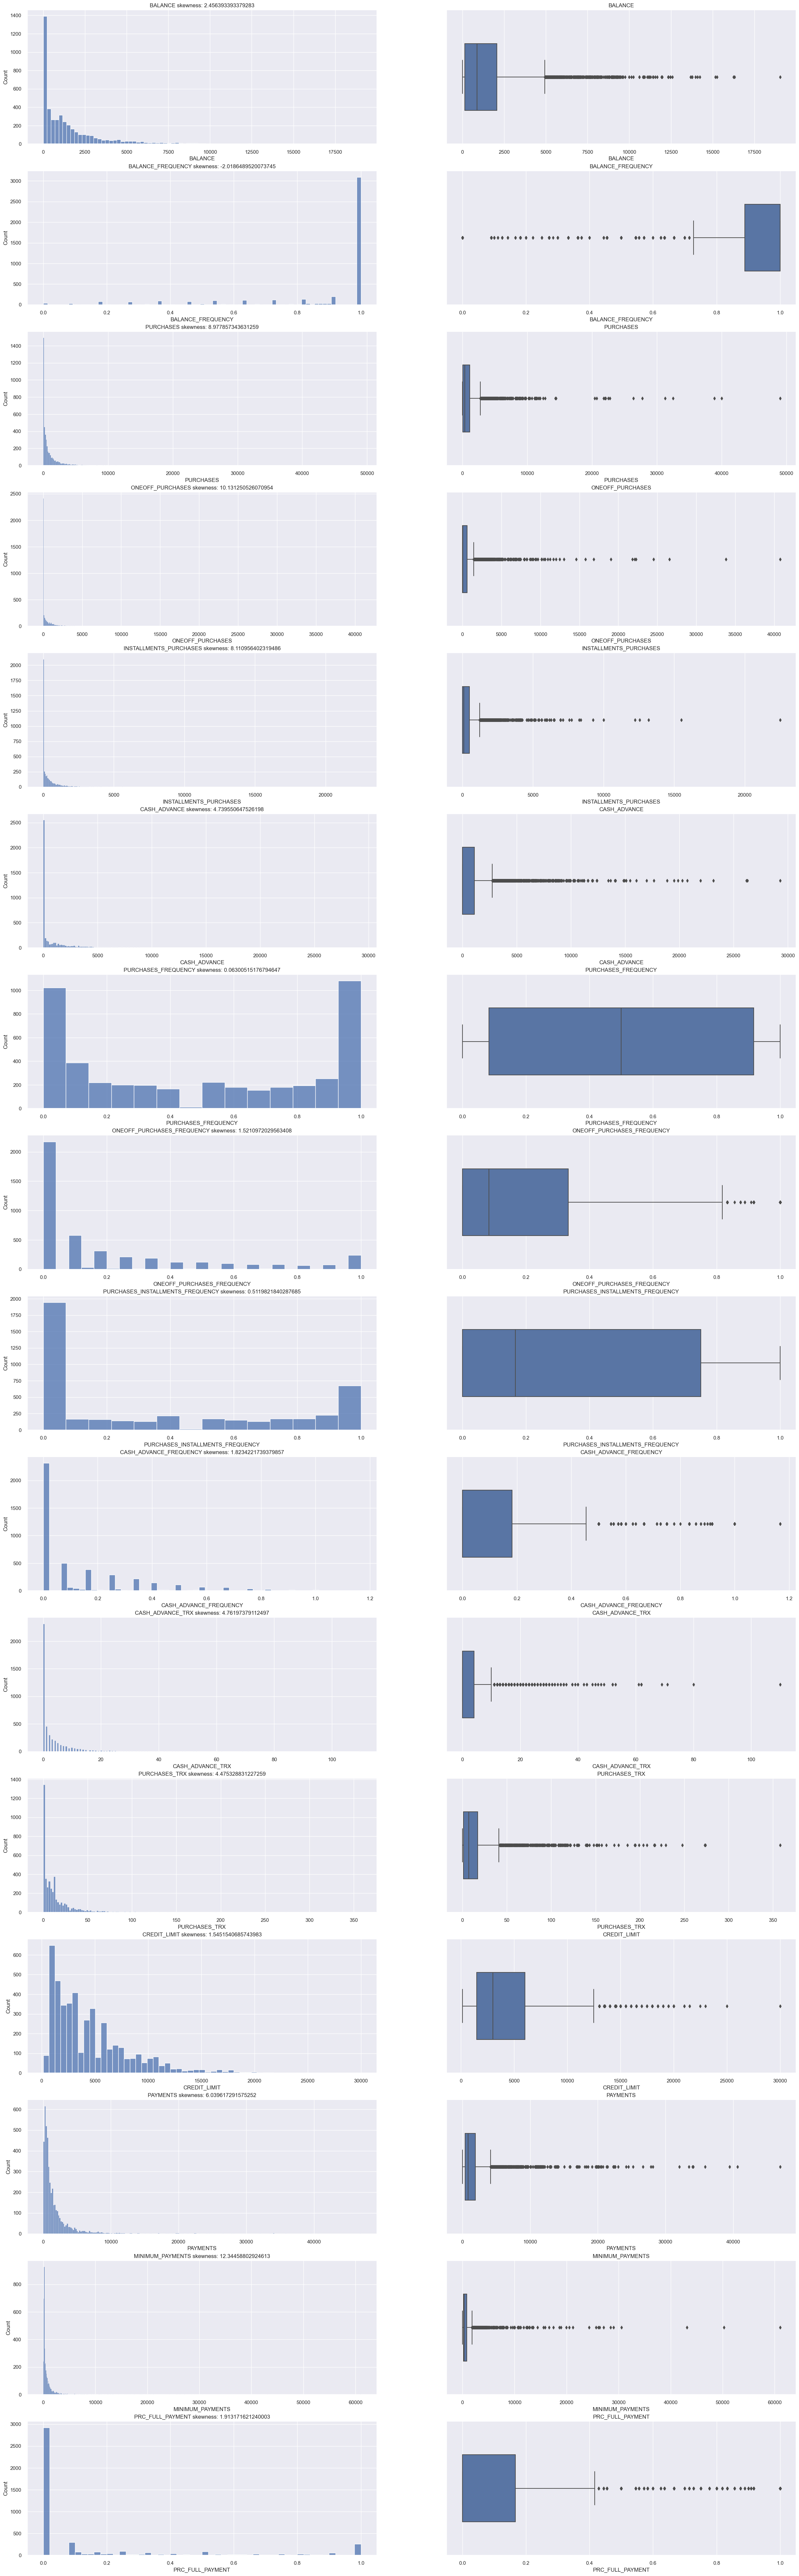

In [166]:
# plot histogram and boxplot
# numerical columns
num_col = ['BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES',
          'CASH_ADVANCE','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY',
          'CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT',
          'PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT']
data_num = data[num_col]
n=len(data_num.columns)
sns.set(font_scale=1)
fig, ax = plt.subplots(n,2,figsize=(30,100))
for i in range(n):
    col = data_num.columns[i]
    sns.histplot(ax=ax[i,0],data=data_num[col])
    ax[i,0].set_title(f'{col} skewness: {data_num[col].skew()}')
    sns.boxplot(ax=ax[i,1],data=data_num,x=data_num[col],width=0.50)
    ax[i,1].set_title(col)

In [167]:
# Create Function to calculate skewness
def skewness(df,col):
  skewness = df[col].skew()
  if skewness>=-0.5 and skewness<=0.5:
    print(f'Ditsribution of {col} : Normal Distribution')
  elif skewness<=-0.5:
    print(f'Distribution of {col} : Left Skewed')
  else:
    print(f'Distribution of {col} : Right Skewed')

In [168]:
# Distribution
n=len(data_num.columns)

for i in range(n):
    col = data_num.columns[i]
    skewness(data_num,col)

Distribution of BALANCE : Right Skewed
Distribution of BALANCE_FREQUENCY : Left Skewed
Distribution of PURCHASES : Right Skewed
Distribution of ONEOFF_PURCHASES : Right Skewed
Distribution of INSTALLMENTS_PURCHASES : Right Skewed
Distribution of CASH_ADVANCE : Right Skewed
Ditsribution of PURCHASES_FREQUENCY : Normal Distribution
Distribution of ONEOFF_PURCHASES_FREQUENCY : Right Skewed
Distribution of PURCHASES_INSTALLMENTS_FREQUENCY : Right Skewed
Distribution of CASH_ADVANCE_FREQUENCY : Right Skewed
Distribution of CASH_ADVANCE_TRX : Right Skewed
Distribution of PURCHASES_TRX : Right Skewed
Distribution of CREDIT_LIMIT : Right Skewed
Distribution of PAYMENTS : Right Skewed
Distribution of MINIMUM_PAYMENTS : Right Skewed
Distribution of PRC_FULL_PAYMENT : Right Skewed


The histograms show that the data distribution of most of the data is right-skewed

## Handling Missing Value

This section contains the process of handling missing values.

In [169]:
# check for missing value
data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    158
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [170]:
# percentage of missing value
print('Missing value: ',round(data.isnull().mean().sum(),2)*100,'%')

Missing value:  4.0 %


In [171]:
# Function to Filling Missing Values with Zeroes, Mean, and Median

def impute_na(df, variable, mean_value, median_value):
  df[variable+'_mean'] = df[variable].fillna(mean_value)
  df[variable+'_median'] = df[variable].fillna(median_value)
  df[variable+'_zero'] = df[variable].fillna(0)
  
  return df

Because the number of missing values in the `CREDIT_LIMIT` column is only 1, then that row will be dropped.

In [172]:
# Dropping one missing value from CREDIT_LIMIT
data.dropna(subset = ['CREDIT_LIMIT'], inplace = True)

There are missing values in the `MINIMUM_PAYMENTS` column index numbers 14,236,412,414,614,etc.  Because the distribution of the `MINIMUM_PAYMENTS` column is right-skewed, the missing value will be filled with the **median**.

In [173]:
# MINIMUM_PAYMENTS is Right Skewed  
data[data.MINIMUM_PAYMENTS.isnull()].sort_index()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                                
14       3215.903805           1.000000     745.48              0.00   
236        26.982025           0.181818     237.60              0.00   
412       150.351606           1.000000     352.92            352.92   
414      4014.388265           1.000000    1189.52           1189.52   
614        44.525353           0.142857     554.16            500.00   
...              ...                ...        ...               ...   
8518        0.000000           0.000000     393.29             45.65   
8552        0.000000           0.000000     125.37              0.00   
8594      161.926545           0.333333    1427.83           1427.83   
8812       11.918653           0.100000     276.79            276.79   
8898        0.000000           0.000000    1090.69            815.70   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
14                       745.48      0.000000             1.000000   
236                      237.60      0.000000             0.166667   
412                        0.00      0.000000             0.333333   
414                        0.00      0.000000             1.000000   
614                       54.16    292.924759             0.142857   
...                         ...           ...                  ...   
8518                     347.64      0.000000             1.000000   
8552                     125.37      0.000000             1.000000   
8594                       0.00      0.000000             0.333333   
8812                       0.00      0.000000             0.100000   
8898                     274.99      0.000000             0.500000   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CUST_ID                                                                 
14                         0.000000                          1.000000   
236                        0.000000                          0.083333   
412                        0.333333                          0.000000   
414                        1.000000                          0.000000   
614                        0.142857                          0.142857   
...                             ...                               ...   
8518                       0.083333                          1.000000   
8552                       0.000000                          1.000000   
8594                       0.333333                          0.000000   
8812                       0.100000                          0.000000   
8898                       0.166667                          0.416667   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CUST_ID                                                            
14                     0.000000               0.0           35.0   
236                    0.000000               0.0            2.0   
412                    0.000000               0.0            4.0   
414                    0.000000               0.0           12.0   
614                    0.142857               1.0            3.0   
...                         ...               ...            ...   
8518                   0.000000               0.0           13.0   
8552                   0.000000               0.0            7.0   
8594                   0.000000               0.0           12.0   
8812                   0.000000               0.0            3.0   
8898                   0.000000               0.0           17.0   

         CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
CUST_ID                                                                      
14             2500.0       0.0               NaN               0.0    12.0  
236            2500.0       0.0               NaN               0.0    12.0  
412            310

In [174]:
# Skewness > 1 = right-skewed, replacing the missing data with median
data['MINIMUM_PAYMENTS'] = round(data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median()).sort_index(),2)
data['MINIMUM_PAYMENTS'].loc[[14,236,412,414,614]]

CUST_ID
14     309.98
236    309.98
412    309.98
414    309.98
614    309.98
Name: MINIMUM_PAYMENTS, dtype: float64

## Handling Outlier

This section explains how to handle outliers.

In [175]:
datacopy = data.copy()
data = data.drop(['TENURE'],axis=1)
# Create Function
def outlier_analysis(df,col):
  skewness = df[col].skew()
  if skewness>=-0.5 and skewness<=0.5:
    upper = df[col].mean() + 3*df[col].std()
    lower = df[col].mean() - 3*df[col].std()
  else:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    upper = Q3 + (1.5 * IQR)
    lower = Q1 - (1.5 * IQR)
    
  no_outliers = df[(df[col]>=lower) &  (df[col]<=upper)]
  outliers = df[(df[col]>upper ) | (df[col]<lower) ]

  return outliers,no_outliers, upper, lower

In [176]:
# percentage of outlier
n=len(data.columns)

for i in range(n):
    col = data.columns[i]
    out,no_out, up, low = outlier_analysis (data,col)
    print(f'column name: {col}')
    print('count of outlier: ', len(out))
    print('percentage of outlier: ', (len(out)/len(data))*100, '%') 
    print('-'*20)

column name: BALANCE
count of outlier:  338
percentage of outlier:  7.571684587813621 %
--------------------
column name: BALANCE_FREQUENCY
count of outlier:  743
percentage of outlier:  16.644265232974913 %
--------------------
column name: PURCHASES
count of outlier:  382
percentage of outlier:  8.557347670250897 %
--------------------
column name: ONEOFF_PURCHASES
count of outlier:  488
percentage of outlier:  10.931899641577061 %
--------------------
column name: INSTALLMENTS_PURCHASES
count of outlier:  411
percentage of outlier:  9.206989247311828 %
--------------------
column name: CASH_ADVANCE
count of outlier:  513
percentage of outlier:  11.491935483870968 %
--------------------
column name: PURCHASES_FREQUENCY
count of outlier:  0
percentage of outlier:  0.0 %
--------------------
column name: ONEOFF_PURCHASES_FREQUENCY
count of outlier:  379
percentage of outlier:  8.490143369175627 %
--------------------
column name: PURCHASES_INSTALLMENTS_FREQUENCY
count of outlier:  0
pe

Because there are too many outliers, outlier handling is done using the Capping Method.

In [177]:
# capping outlier if exist and in large proportion
wins = Winsorizer(capping_method='iqr', tail='both', fold=1.5)
data_capped = wins.fit_transform(data)
print('Size of dataset - After Capped  : ', data_capped.shape)

Size of dataset - After Capped  :  (4464, 16)


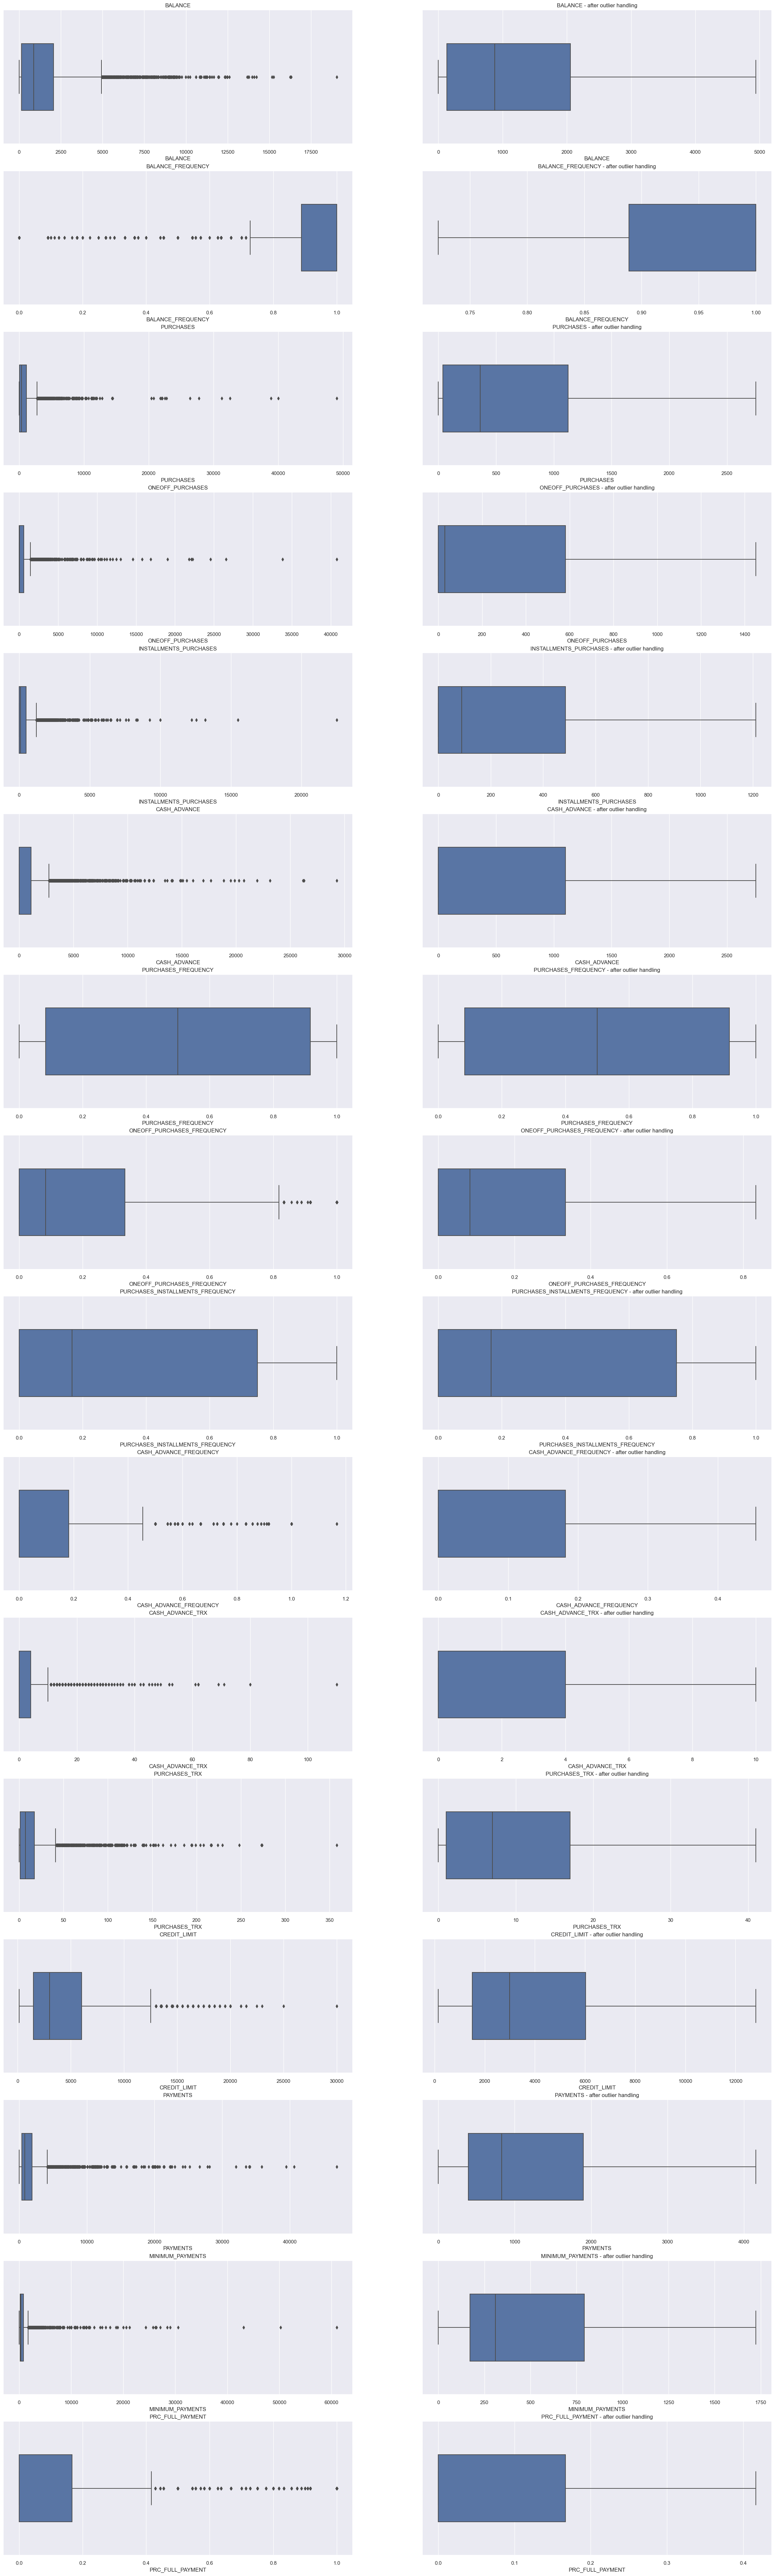

In [178]:
# Boxplot visualization
n=len(data.columns)
sns.set(font_scale=1)
fig, ax = plt.subplots(n,2,figsize=(30,100))
for i in range(n):
    col = data.columns[i]
    sns.boxplot(ax=ax[i,0],data=data,x=data[col],width=0.50)
    ax[i,0].set_title(f'{col}')
    sns.boxplot(ax=ax[i,1],data=data_capped,x=data_capped[col],width=0.50)
    ax[i,1].set_title(f'{col} - after outlier handling')

## Multicollinearity

Look up VIF (Variance Inflation Factor) to see multicollinearity between columns. 

In [179]:
# Multicollinearity
vif_data = pd.DataFrame()
vif_data["feature"] = data_capped.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data_capped.values, i) for i in range(len(data_capped.columns))]

vif_data

feature        VIF
0                            BALANCE   9.326955
1                  BALANCE_FREQUENCY   7.087235
2                          PURCHASES  27.348949
3                   ONEOFF_PURCHASES  15.632009
4             INSTALLMENTS_PURCHASES  11.466293
5                       CASH_ADVANCE   5.003618
6                PURCHASES_FREQUENCY  27.077375
7         ONEOFF_PURCHASES_FREQUENCY   9.913593
8   PURCHASES_INSTALLMENTS_FREQUENCY  22.330691
9             CASH_ADVANCE_FREQUENCY  12.515291
10                  CASH_ADVANCE_TRX  12.509118
11                     PURCHASES_TRX  11.277902
12                      CREDIT_LIMIT   4.846446
13                          PAYMENTS   4.324909
14                  MINIMUM_PAYMENTS   7.433424
15                  PRC_FULL_PAYMENT   2.127073

From the table above:
- There are only 2 features that are not related to other features (VIF 1-5): `CREDIT_LIMIT` and `PAYMENTS`.

Dealing multicollinearity can be done at least by two methods:
- Dropping highly correlated variables
- Extracting new features with Principal Component Analysis (PCA)

The table above is an example if we handle multicollinearity with dropping some independent variables with high VIF. High VIF reduces the precision of the estimated coefficients, which weakens the statistical power of the regression model later.

## Dimensionality Reduction (PCA)

Dimensionality reduction, or dimension reduction, is the transformation of data from a high-dimensional space into a low-dimensional space. This aims to create less multicollinearity, rather than dropping the variables without considering its importance. Moreover, high dimensionality can create noises in the clustering analysis, which can reduce its accuracy to cluster the variables. Thus, Principal Component Analysis can reduce this high dimensionality.

In [180]:
# Scaling data features with MinMaxScaler()
s_minmaxscaler = MinMaxScaler()
data_minmax_scaled = s_minmaxscaler.fit_transform(data_capped)

In [181]:
# Fitting the scaled data with PCA 95%
pca = PCA()
pca.fit(data_minmax_scaled)
# cumsum
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.35163686, 0.58242406, 0.68672862, 0.77727153, 0.83359823,
       0.88059917, 0.90998309, 0.93160899, 0.95049123, 0.96432226,
       0.97614487, 0.98413307, 0.99037854, 0.99443831, 0.99819434,
       1.        ])

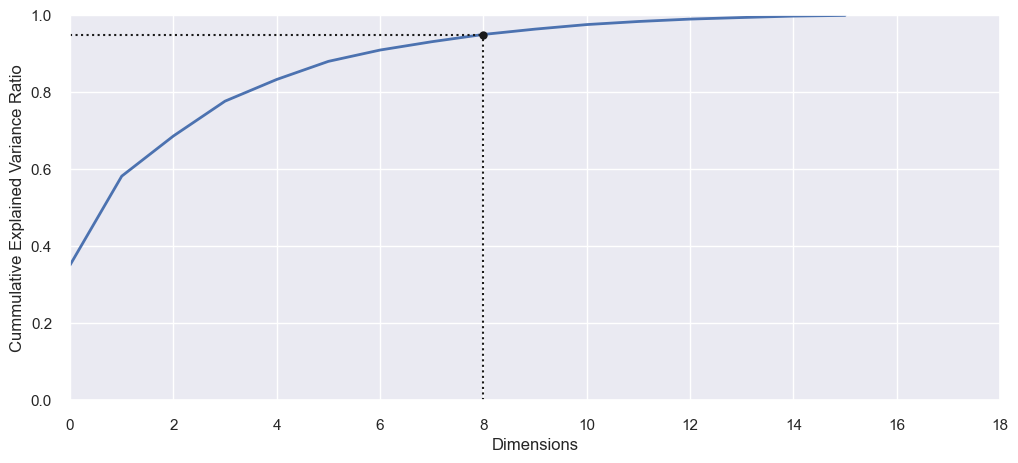

In [182]:
d = np.argmax(cumsum >= 0.95)
# Plotting PCA
plt.figure(figsize=(12,5))
plt.plot(cumsum, linewidth=2)
plt.axis([0, 18, 0, 1]) # xmin, xmax, ymin, ymax
plt.xlabel("Dimensions")
plt.ylabel("Cummulative Explained Variance Ratio")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.grid(True)
plt.show()
     

with a pca value of 95%, 9 components are good enough to be the principal components. However, we need to evaluate it more if 9 components are good enough to be the principal components. Below is the graph which shows the number of principal components we actually need.

In [183]:
pca.explained_variance_ratio_

array([0.35163686, 0.2307872 , 0.10430456, 0.09054291, 0.0563267 ,
       0.04700094, 0.02938392, 0.0216259 , 0.01888225, 0.01383103,
       0.01182261, 0.0079882 , 0.00624546, 0.00405978, 0.00375602,
       0.00180566])

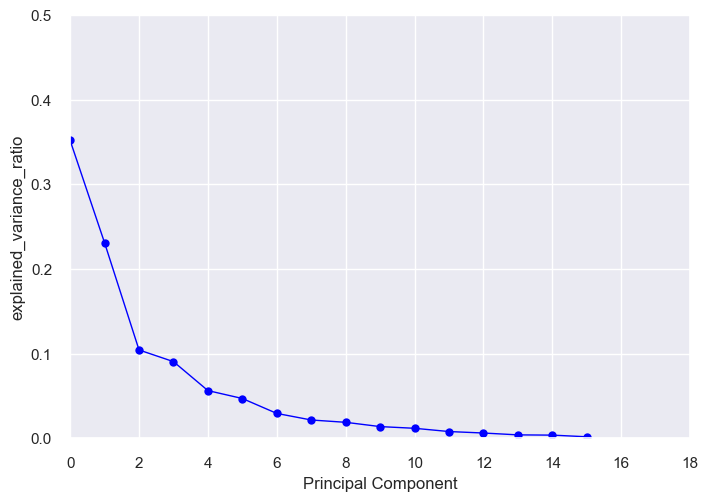

In [184]:
# Plot EVR
PC_values = np.arange(pca.n_components_)
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=1, color='blue')
plt.axis([0, 18, 0, 0.5])
plt.xlabel('Principal Component')
plt.ylabel('explained_variance_ratio')
plt.show()

**PCA with the best n_components: 3**

Number of components that we need are just 3 components based on the significant change. And after component 3, there is only a slight change so component 4 and the rest are not included.

In [185]:
# PCA with the best number of components = 3
pca = PCA(n_components=3)
data_reduced = pca.fit_transform(data_minmax_scaled)    

---

# vii. Model Definition
> This section contains cells to define the model. Clustering algorithms that will be used are :
- K-Means Clustering
- Agglomerative Clustering
- Spectral Clustering

---

# viii. Model Training
> This section explains the process to train the model that we defined using the algorithm that has been determined in the previous chapter.

## K-Means Clustering

K-Means algorithm is a centroid based algorithm. It tries to make all cluster data points as similar as possible while keeping each cluster distinct. It designs the data points into a cluster in such a way that the sum of the squared distances between the data points and the cluster centroid minimum. The less variation we have within a cluster, the more homogeneous the data points are within the same cluster.

Text(0, 0.5, 'Inertia')

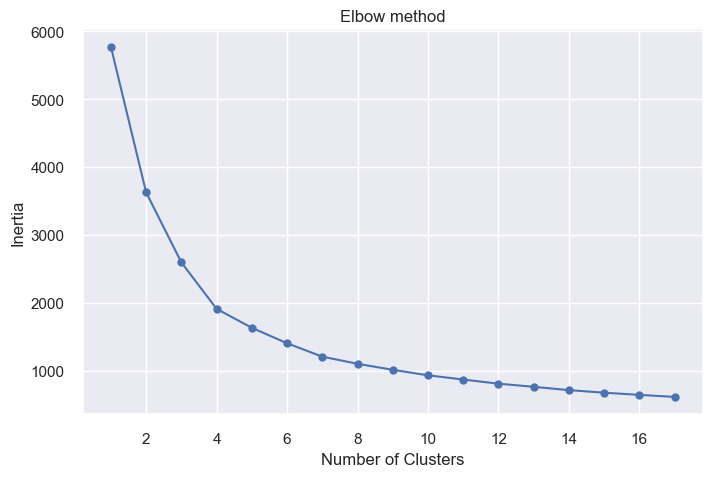

In [186]:
# find the best k value
kmeans_models = [KMeans(n_clusters=k, init="k-means++", n_init=10, max_iter=300, random_state=0).fit(data_reduced) for k in range (1, 18)]
inertia = [model.inertia_ for model in kmeans_models]

plt.figure(figsize=(8, 5))
plt.plot(range(1, 18), inertia, 'bo-')
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
     

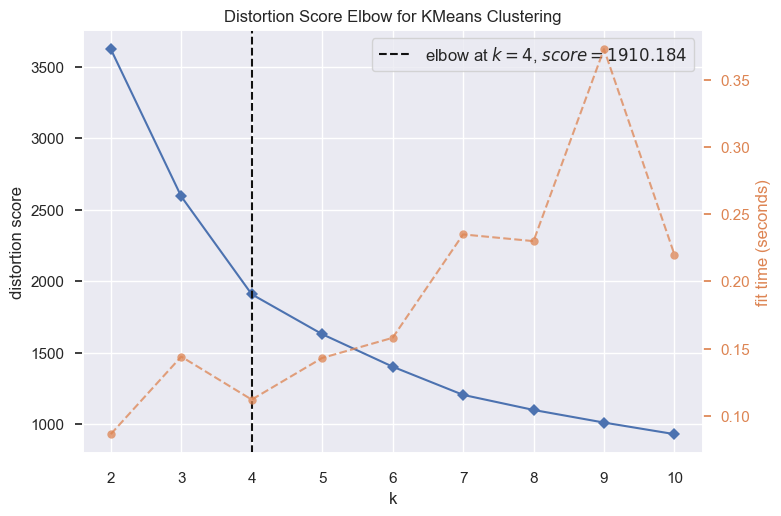

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [187]:
# find the best k value with KElbowVisualizer
Elbow_M = KElbowVisualizer(KMeans(init="k-means++", n_init=10, max_iter=300, random_state=0))
Elbow_M.fit(data_reduced)
Elbow_M.show()

There is a significant change of Distortion Score from cluster 2 to cluster 4, and the elbow is at **cluster 4**. For more details, see the silhouette visualization below.

In [188]:
# silhoutte score per k
kmeans_per_k = [KMeans(n_clusters=k, init="k-means++", n_init=10, max_iter=300, random_state=0).fit(data_reduced)
                for k in range(1, 10)]
silhouette_scores = [silhouette_score(data_reduced, model.labels_)
                     for model in kmeans_per_k[1:]]

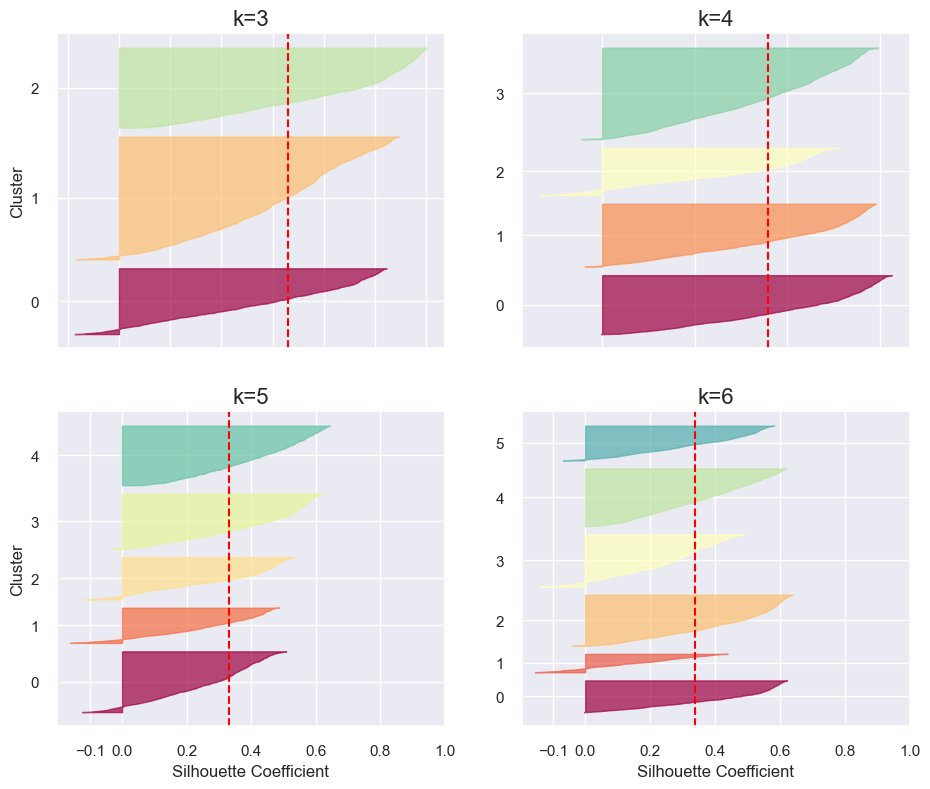

In [189]:
# plotting silhouette
plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(data_reduced,y_pred)

    padding = len(data_reduced) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"k={k}", fontsize=16)
plt.show()

**Visualization using K-Means for k=4.**

In [190]:
# K-Means, k=4
kmeans = KMeans(n_clusters=4, init="k-means++", n_init=10, max_iter=300, random_state=0)
kmeans.fit(data_reduced)

KMeans(n_clusters=4, n_init=10, random_state=0)

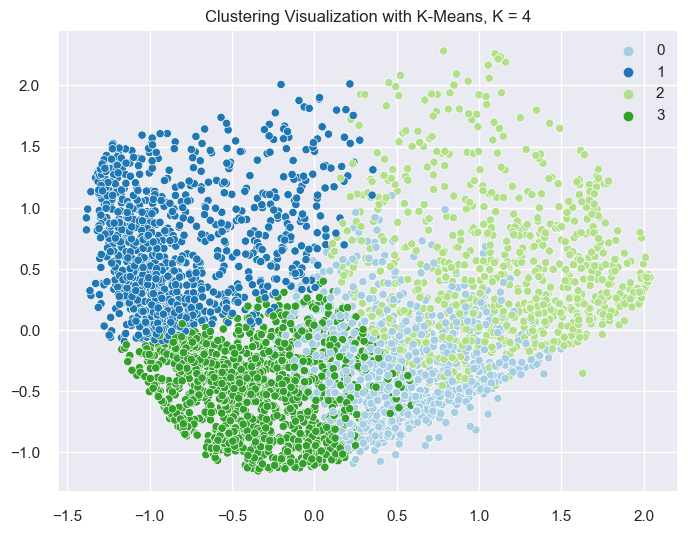

In [191]:
# Scatter plot
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(x=data_reduced[:,0], y=data_reduced[:,1], hue=kmeans.labels_, palette='Paired')
ax.set_title('Clustering Visualization with K-Means, K = 4');

There are still many clusters mixed with other clusters. 

**visualization using K-Means for k=3.**

In [192]:
# K-Means, k=3
kmeans = KMeans(n_clusters=3, init="k-means++", n_init=10, max_iter=300, random_state=0)
kmeans.fit(data_reduced)

KMeans(n_clusters=3, n_init=10, random_state=0)

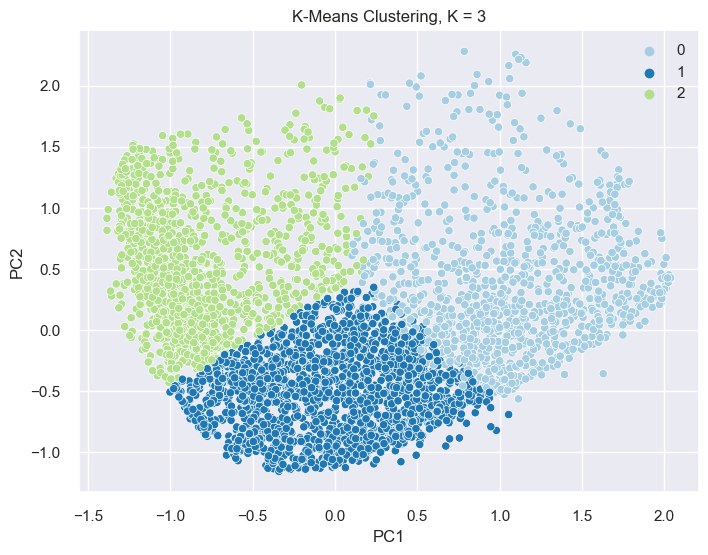

In [193]:
# Scatter plot
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(x=data_reduced[:,0], y=data_reduced[:,1], hue=kmeans.labels_, palette='Paired')
ax.set_title('K-Means Clustering, K = 3')
plt.xlabel('PC1')
plt.ylabel('PC2');

With a total of **3 clusters**, the distribution of data is more even.

In [194]:
# Define K-Means using n_clusters=3
k = 3
kmeans = KMeans(n_clusters=k, init="k-means++", n_init=10, max_iter=300, random_state=0)
y_pred = kmeans.fit_predict(data_reduced)
y_pred
     

array([2, 2, 2, ..., 2, 1, 1])

In [195]:
# how many iterations it takes for it to converge
kmeans.n_iter_ 

9

## Agglomerative Clustering

Agglomerative Clustering is the same as hierarchical clustering, a method of cluster analysis that seeks to build a hierarchy of clusters. Number of clusters are still needed like in KMeans, however, the evaluation can be different, where Agglomerative Clusttering uses dendogram to evaluate the number of cluster.

In [196]:
# agglomerative clustering
agg = AgglomerativeClustering(linkage="complete", n_clusters=3)
y_agg = agg.fit_predict(data_reduced)
y_agg

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

## Spectral Clustering
Spectral Clustering is a growing clustering algorithm which has performed better than many traditional clustering algorithms in many cases. It treats each data point as a graph node and thus transforms the clustering problem into a graph-partitioning problem.

In [197]:
# Spectral Clustering
scl = SpectralClustering (n_clusters=3, gamma=0.01)
scl.fit(data_reduced)

SpectralClustering(gamma=0.01, n_clusters=3)

---

# ix. Model Evaluation
> In this section, a model evaluation is carried out.

## Clustering Result and Visualization
This section explains cluster grouping based on the clustering algorithm.

In [198]:
# Clustering Result
Cluster = data_capped.copy()
Cluster['cluster_kmeans'] = kmeans.labels_
Cluster['cluster_agglo'] = agg.labels_
Cluster['cluster_Spectral'] = scl.labels_
Cluster.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                                
2        4613.570499                1.0       0.00              0.00   
4        2583.247881                1.0    1337.35             45.65   
6        1597.911395                1.0       0.00              0.00   
8        3506.489102                1.0       0.00              0.00   
10       2306.310095                1.0     359.96              0.00   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
2                       0.00000   1728.341939             0.000000   
4                    1211.30625   2484.594650             1.000000   
6                       0.00000    162.919727             0.000000   
8                       0.00000   2749.689768             0.000000   
10                    359.96000   2749.689768             0.916667   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CUST_ID                                                                 
2                          0.000000                          0.000000   
4                          0.083333                          1.000000   
6                          0.000000                          0.000000   
8                          0.000000                          0.000000   
10                         0.000000                          0.916667   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CUST_ID                                                            
2                      0.090909               1.0            0.0   
4                      0.454545              10.0           21.0   
6                      0.250000               3.0            0.0   
8                      0.454545              10.0            0.0   
10                     0.333333               6.0           11.0   

         CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
CUST_ID                                                                  
2              6000.0   922.218961          1460.640               0.0   
4              3000.0   819.792196          1723.565               0.0   
6              1800.0   548.420841           416.960               0.0   
8              5000.0   286.708354           628.480               0.0   
10             4000.0  1482.816136          1723.565               0.0   

         cluster_kmeans  cluster_agglo  cluster_Spectral  
CUST_ID                                                   
2                     2              0                 1  
4                     2              1                 1  
6                     2              0                 0  
8                     2              1                 1  
10                    2              1                 1

### 2D Visualization

This section contains visualization in 2D of clustering based on each clustering algorithm.

Text(0, 0.5, 'PC2')

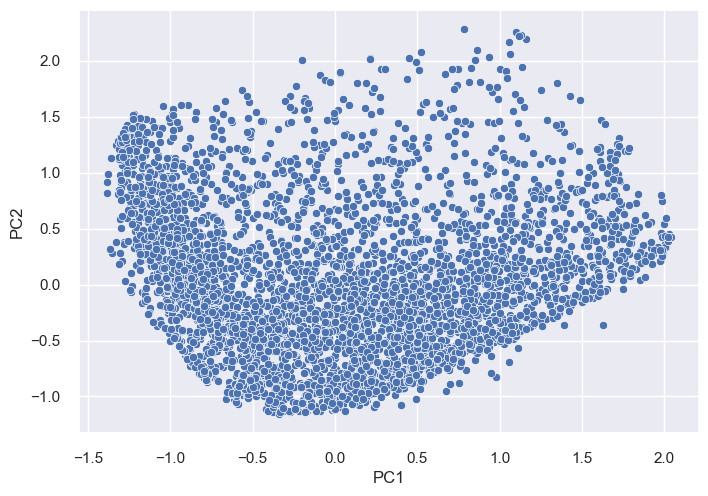

In [222]:
# 2d Visualization 
pca_2d = PCA(n_components=2, random_state=0)
X_2d  = pca_2d.fit_transform(data_minmax_scaled)
sns.scatterplot(x=X_2d[:,0],y=X_2d[:,1],)
plt.xlabel('PC1')
plt.ylabel('PC2')

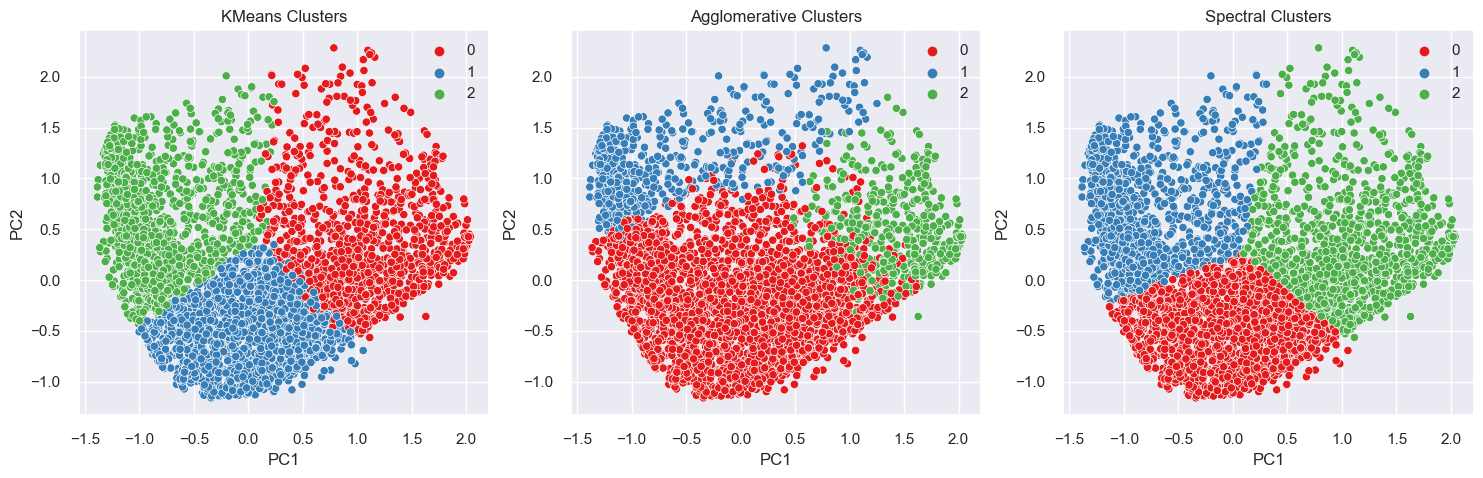

In [221]:
#2D plot for each algorithm
plt.figure(figsize=(18, 5))

plt.subplot(1,3,1)
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=kmeans.labels_, palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clusters')

plt.subplot(1,3,2)
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=agg.labels_, palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Agglomerative Clusters')

plt.subplot(1,3,3)
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=scl.labels_, palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Spectral Clusters')
plt.show()

Based on the visualization above, the clustering performed by the K-Means Algorithm appears to be more evenly distributed, with only minimal data overlap.

### 3D Visualization

This section contains visualization in 3D of clustering based on each clustering algorithm.

In [201]:
#3D plot for each algorithm
# PCA with the best number of components = 3
pca_3d  = PCA(n_components=3)
X_3d = pca_3d.fit_transform(data_minmax_scaled)    

**K_Means**

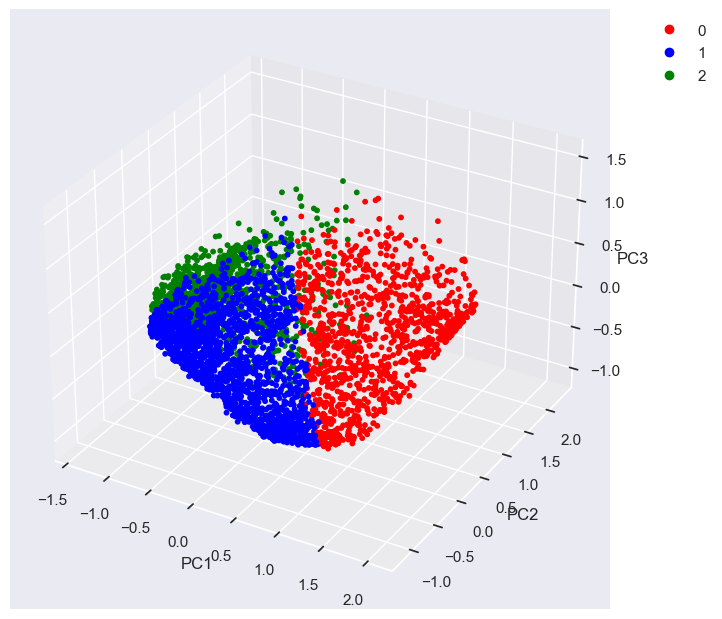

In [202]:
# Kmeans
# generate data
x = X_3d[:,0]
y = X_3d[:,1]
z = X_3d[:,2]

# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# get colormap from seaborn
colors =["red","blue","green"]
cmap = ListedColormap(colors=colors)


# plot
sc = ax.scatter(x, y, z, s=10, c=kmeans.labels_, cmap=cmap, alpha=1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

**Agglomerative Clustering**

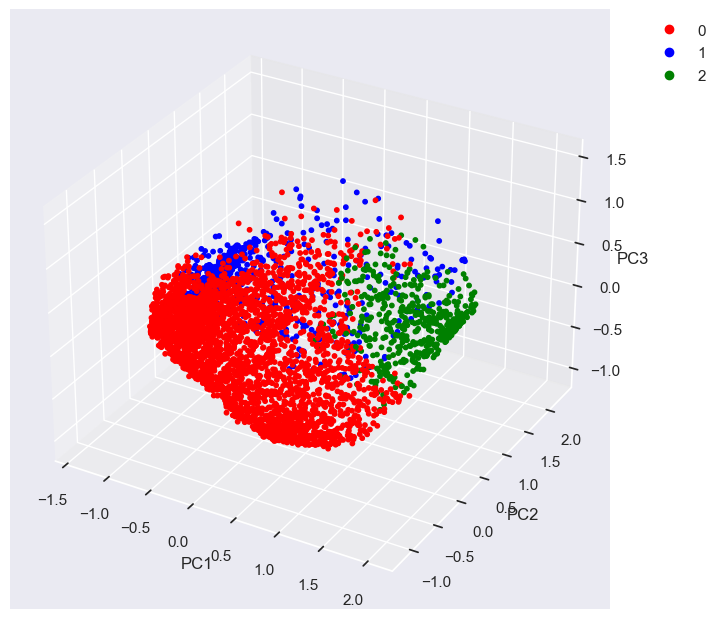

In [203]:
# Agglomerative Clustering
# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# get colormap from seaborn
colors =["red","blue","green"]
cmap = ListedColormap(colors=colors)


# plot
sc = ax.scatter(x, y, z, s=10, c=agg.labels_, cmap=cmap, alpha=1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

**Spectral Clustering**

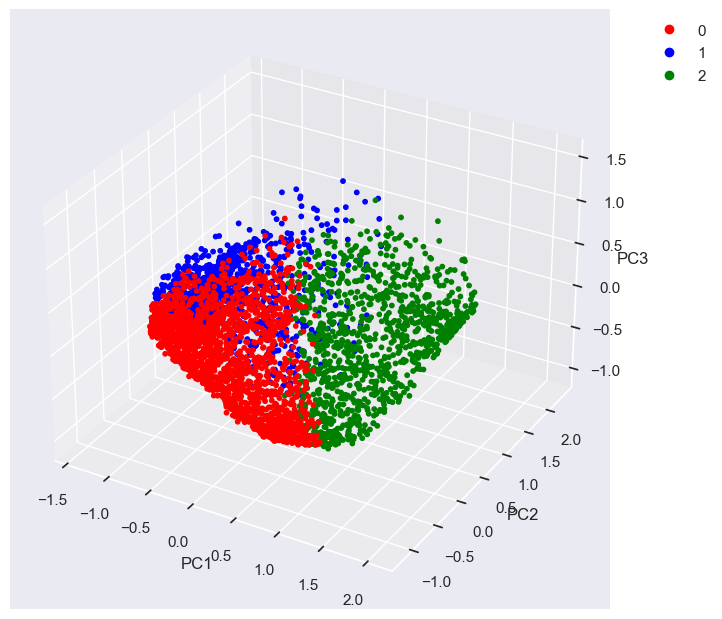

In [204]:
# Spectral Clustering
# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# get colormap from seaborn
colors =["red","blue","green"]
cmap = ListedColormap(colors=colors)


# plot
sc = ax.scatter(x, y, z, s=10, c=scl.labels_, cmap=cmap, alpha=1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

Based on the 3D visualization above, the clustering performed by the K-Means Algorithm appears to be more evenly distributed, with only minimal data overlap.

### Silhouette Score

This section contains the silhouette score calculation.

In [205]:
# Silhouette score for each algorithm
print("silhouette score KMeans : ",silhouette_score(data_reduced,kmeans.labels_))
print("silhouette score Agglomerative : ",silhouette_score(data_reduced,agg.labels_))
print("silhouette score Spectral Clustering : ",silhouette_score(data_reduced,scl.labels_))

silhouette score KMeans :  0.33077220464902174
silhouette score Agglomerative :  0.28074169181839276
silhouette score Spectral Clustering :  0.32873882219177913


As shown by the 2d and 3d visualization results, the K-Means silhouette score results is also the highest. A score closer to 1 indicates better performance, with a lower incidence of data assigned to incorrect clusters.

## EDA after Clustering

This section contains Exploratory Data Analysis (EDA) after Clustering.

In [206]:
Cluster.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                                
2        4613.570499                1.0       0.00              0.00   
4        2583.247881                1.0    1337.35             45.65   
6        1597.911395                1.0       0.00              0.00   
8        3506.489102                1.0       0.00              0.00   
10       2306.310095                1.0     359.96              0.00   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
2                       0.00000   1728.341939             0.000000   
4                    1211.30625   2484.594650             1.000000   
6                       0.00000    162.919727             0.000000   
8                       0.00000   2749.689768             0.000000   
10                    359.96000   2749.689768             0.916667   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CUST_ID                                                                 
2                          0.000000                          0.000000   
4                          0.083333                          1.000000   
6                          0.000000                          0.000000   
8                          0.000000                          0.000000   
10                         0.000000                          0.916667   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CUST_ID                                                            
2                      0.090909               1.0            0.0   
4                      0.454545              10.0           21.0   
6                      0.250000               3.0            0.0   
8                      0.454545              10.0            0.0   
10                     0.333333               6.0           11.0   

         CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
CUST_ID                                                                  
2              6000.0   922.218961          1460.640               0.0   
4              3000.0   819.792196          1723.565               0.0   
6              1800.0   548.420841           416.960               0.0   
8              5000.0   286.708354           628.480               0.0   
10             4000.0  1482.816136          1723.565               0.0   

         cluster_kmeans  cluster_agglo  cluster_Spectral  
CUST_ID                                                   
2                     2              0                 1  
4                     2              1                 1  
6                     2              0                 0  
8                     2              1                 1  
10                    2              1                 1

Text(0.5, 1.0, 'Spectral Cluster Distribution')

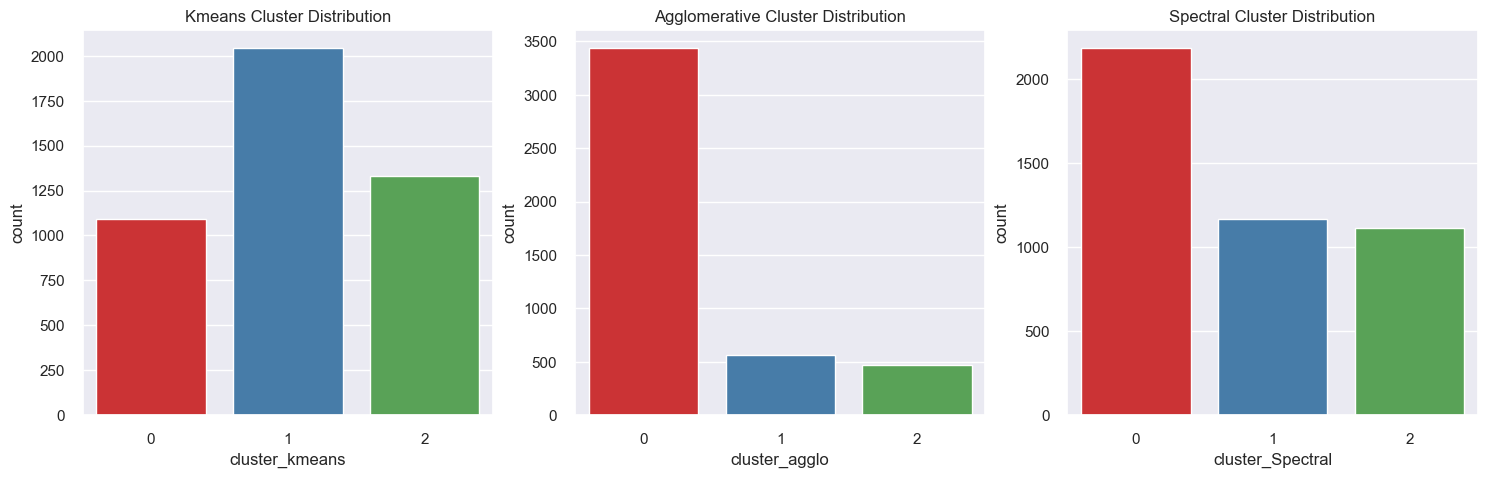

In [207]:
# Barplot visualization after Clustering
plt.figure(figsize=(18, 5))

plt.subplot(1,3,1)
sns.countplot(data=Cluster, x='cluster_kmeans', palette='Set1')
plt.title('Kmeans Cluster Distribution')

plt.subplot(1,3,2)
sns.countplot(data=Cluster, x='cluster_agglo', palette='Set1')
plt.title('Agglomerative Cluster Distribution')

plt.subplot(1,3,3)
sns.countplot(data=Cluster, x='cluster_Spectral', palette='Set1')
plt.title('Spectral Cluster Distribution')

Based on the visualization above, the clustering algorithm chosen is __K-Means__.Then EDA is carried out based on this algorithm.

In [208]:
# Final of Clustering
cluster_final = Cluster.copy()
cluster_final = cluster_final.drop(['cluster_agglo','cluster_Spectral'],axis=1)
cluster_final = cluster_final.rename(columns={'cluster_kmeans':'CLUSTER'})
cluster_final.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                                
2        4613.570499                1.0       0.00              0.00   
4        2583.247881                1.0    1337.35             45.65   
6        1597.911395                1.0       0.00              0.00   
8        3506.489102                1.0       0.00              0.00   
10       2306.310095                1.0     359.96              0.00   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
2                       0.00000   1728.341939             0.000000   
4                    1211.30625   2484.594650             1.000000   
6                       0.00000    162.919727             0.000000   
8                       0.00000   2749.689768             0.000000   
10                    359.96000   2749.689768             0.916667   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CUST_ID                                                                 
2                          0.000000                          0.000000   
4                          0.083333                          1.000000   
6                          0.000000                          0.000000   
8                          0.000000                          0.000000   
10                         0.000000                          0.916667   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CUST_ID                                                            
2                      0.090909               1.0            0.0   
4                      0.454545              10.0           21.0   
6                      0.250000               3.0            0.0   
8                      0.454545              10.0            0.0   
10                     0.333333               6.0           11.0   

         CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
CUST_ID                                                                  
2              6000.0   922.218961          1460.640               0.0   
4              3000.0   819.792196          1723.565               0.0   
6              1800.0   548.420841           416.960               0.0   
8              5000.0   286.708354           628.480               0.0   
10             4000.0  1482.816136          1723.565               0.0   

         CLUSTER  
CUST_ID           
2              2  
4              2  
6              2  
8              2  
10             2

In [209]:
# Value counts for each cluster
cluster_final.CLUSTER.value_counts().to_frame()

CLUSTER
1     2041
2     1329
0     1094

In [210]:
#Separating cluster
cluster0 = cluster_final[(cluster_final['CLUSTER'] == 0)]
cluster1 = cluster_final[(cluster_final['CLUSTER'] == 1)]
cluster2 = cluster_final[(cluster_final['CLUSTER'] == 2)]

In [211]:
# data summary
summary = pd.DataFrame()
summary['CLUSTER'] = [0,1,2]

for i in cluster_final:
    data = []
    data.append(cluster0[i].mean())
    data.append(cluster1[i].mean())
    data.append(cluster2[i].mean())

    summary[i] = data
summary

CLUSTER      BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
0      0.0  1702.321449           0.982519  1998.162349        931.260430   
1      1.0   496.333163           0.882724   418.490690        193.151044   
2      2.0  2503.609339           0.963786   205.264799        130.677096   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0              768.119186    374.087932             0.917573   
1              209.077131    130.492111             0.477579   
2               63.305676   1689.933471             0.156716   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.491670                          0.717381   
1                    0.111949                          0.356683   
2                    0.070124                          0.086735   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.069075          1.375686      29.619744   6251.754404   
1                0.030799          0.476727       7.578638   3082.552398   
2                0.292671          6.112114       2.841234   4833.596689   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
0  2257.258655        644.302139          0.140938  
1   725.893955        306.744811          0.121278  
2  1511.645779        862.002453          0.028083

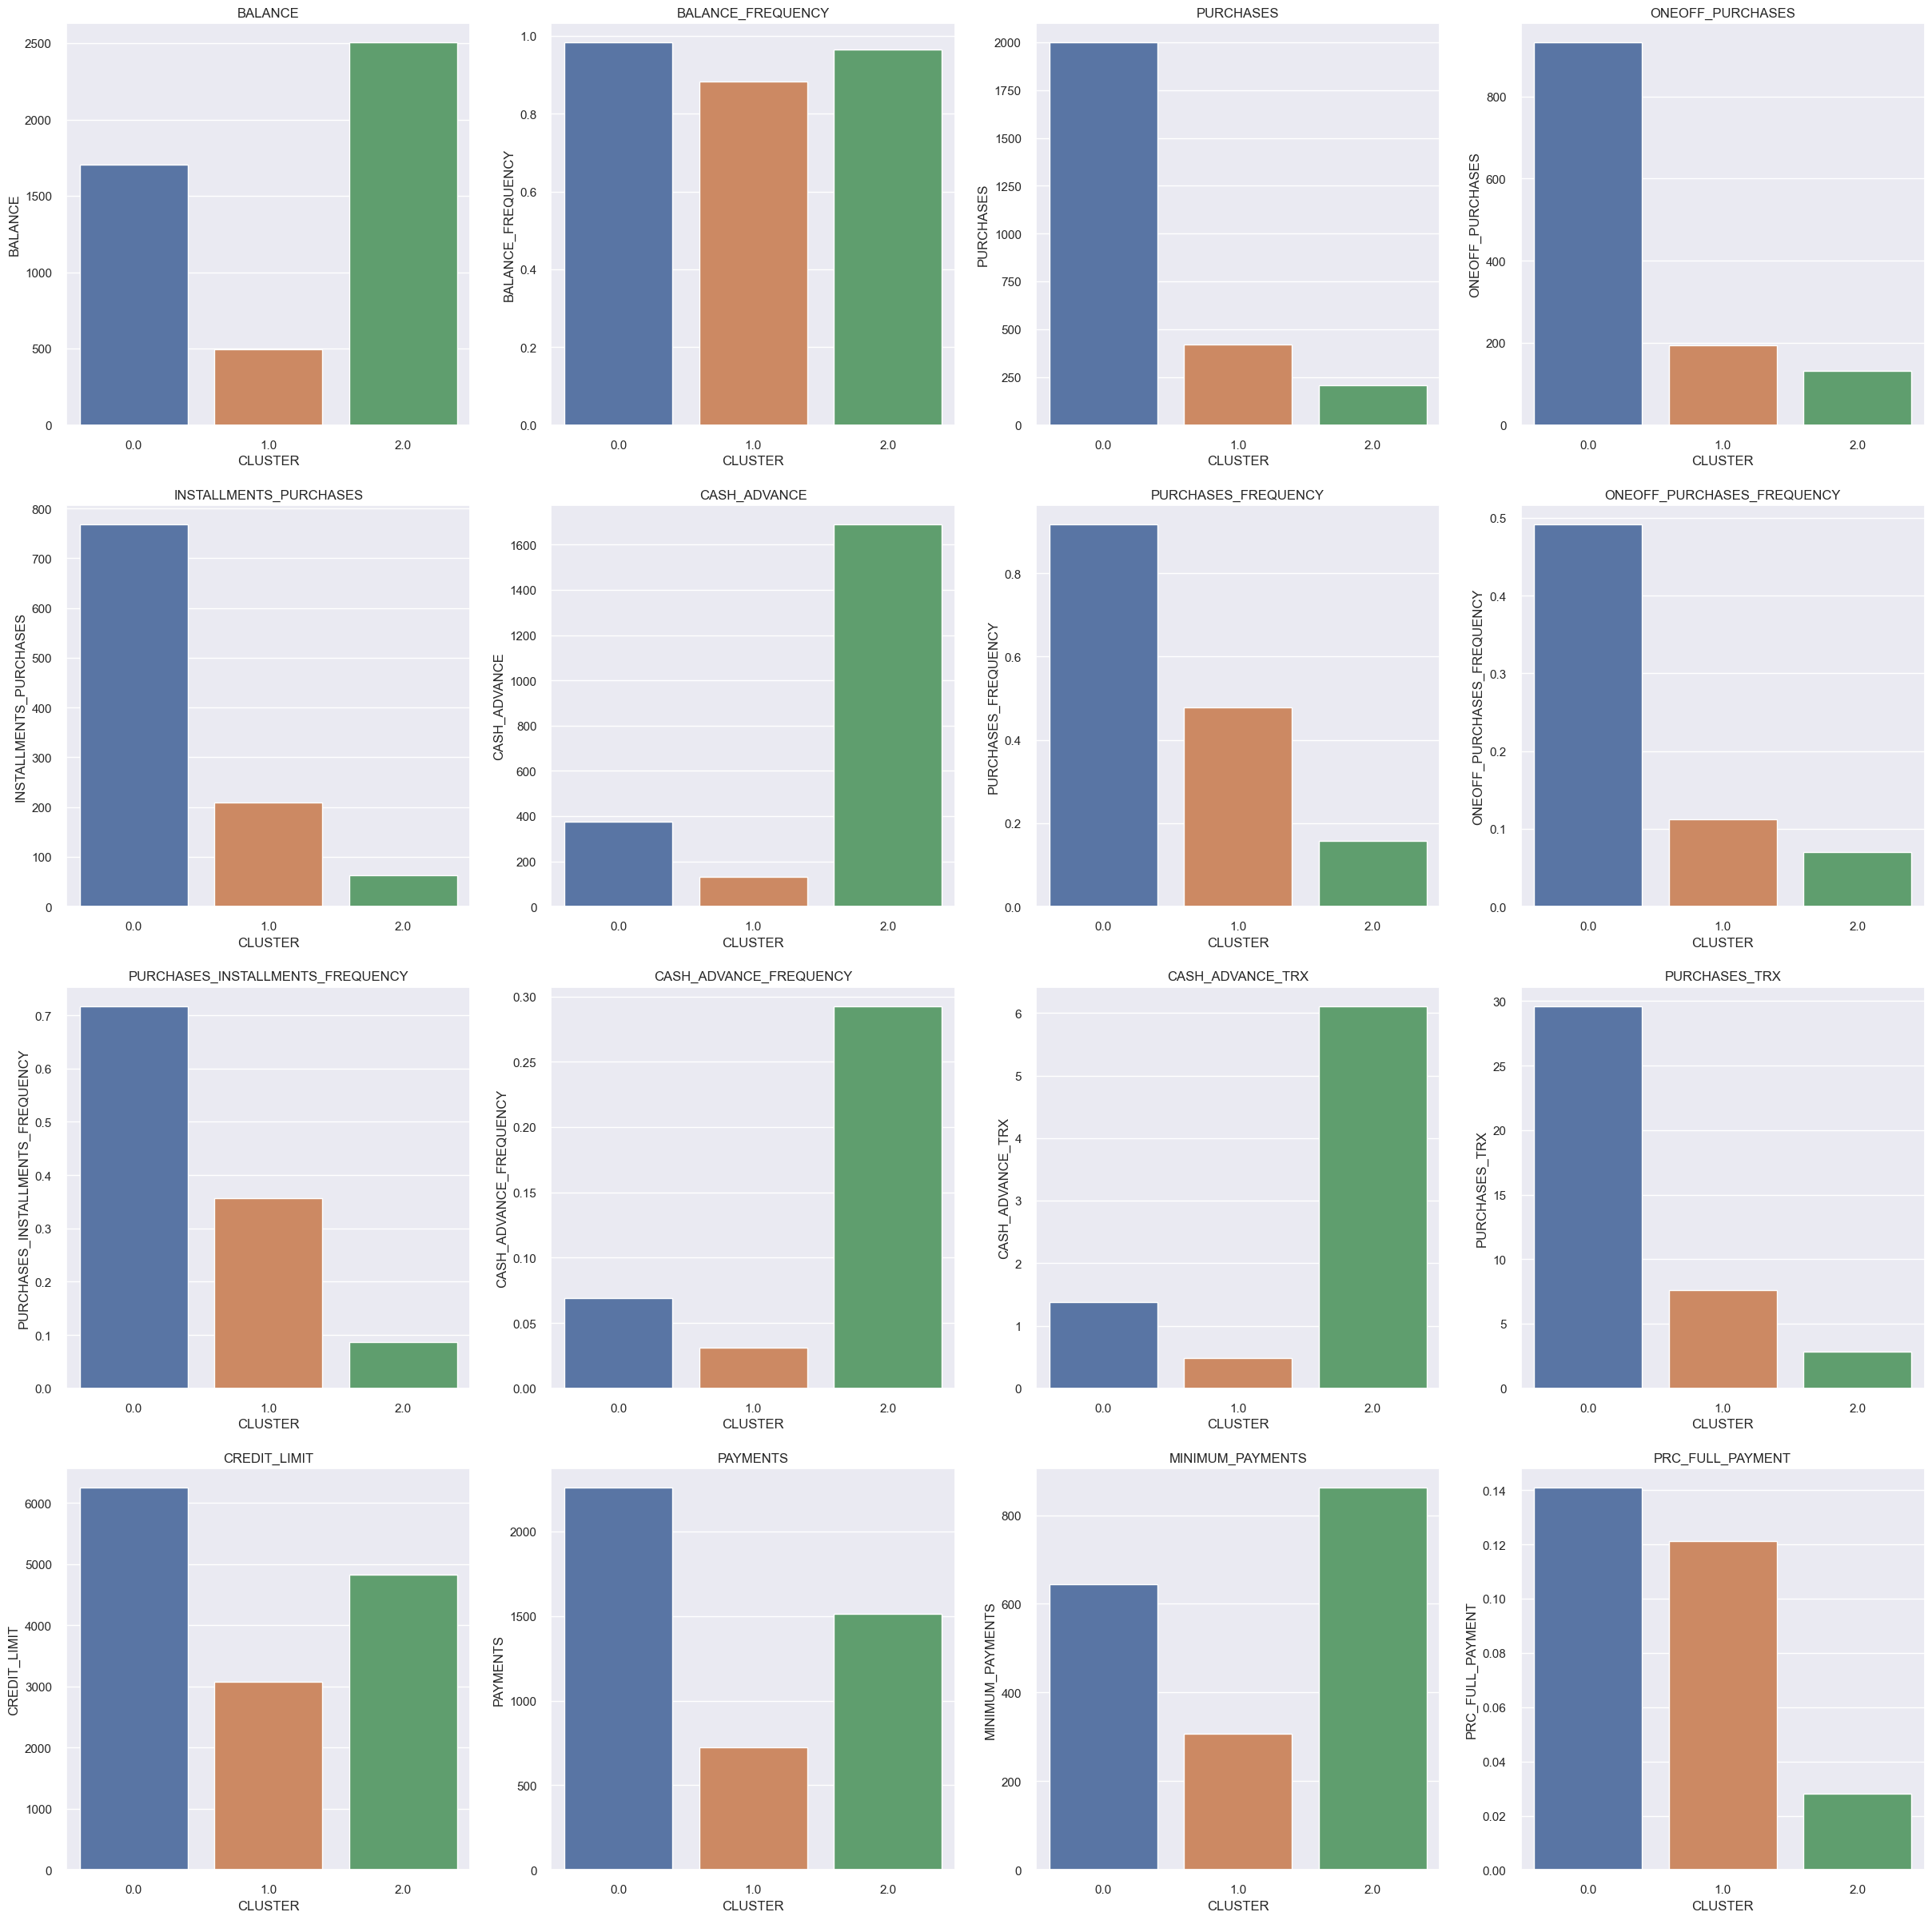

In [212]:
cf = cluster_final.drop(['CLUSTER'],axis=1)
# Barchart Visualizations
plt.figure(figsize=(30, 30))
n=len(cf.columns)
sns.set(font_scale=1)
for i in range(n):
    plt.subplot(4,4,i+1)
    col = cf.columns[i]
    sns.barplot(data=summary,x=summary['CLUSTER'],y=summary[col],ci=None)
    plt.title(f'{col}')

### Summary of EDA

In [213]:
summary

CLUSTER      BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
0      0.0  1702.321449           0.982519  1998.162349        931.260430   
1      1.0   496.333163           0.882724   418.490690        193.151044   
2      2.0  2503.609339           0.963786   205.264799        130.677096   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0              768.119186    374.087932             0.917573   
1              209.077131    130.492111             0.477579   
2               63.305676   1689.933471             0.156716   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.491670                          0.717381   
1                    0.111949                          0.356683   
2                    0.070124                          0.086735   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.069075          1.375686      29.619744   6251.754404   
1                0.030799          0.476727       7.578638   3082.552398   
2                0.292671          6.112114       2.841234   4833.596689   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
0  2257.258655        644.302139          0.140938  
1   725.893955        306.744811          0.121278  
2  1511.645779        862.002453          0.028083

- The quantity of each cluster shaped from KMeans model. We can see the segmentation will be: 
    - Cluster 0 : 1094
    - Cluster 1 : 1329
    - Cluster 2 : 2041

- **Cluster 0** is for credit card holders who frequently make purchases, with the characteristics : 
    - Have **medium** `Balance` amount left in their account to make purchases,
    - **Frequently** update `Balance Frequency`
    - Have **high** amount, number of transaction and **often** `purchase being made` from their account
    - Have **high** maximum purchase amount done and **often** `purchase are happening in one-go`
    - Have **high** amount and **often** `purchase done in installment` made from their acccount 
    - Have **medium** amount, number of transaction and **sometime** uses Cash in Advance
    - Have **high** limit of Credit Card
    - Have **high** amount of payments done
    - Have **medium** Minimum amount of payments made
    - Have **high** percent of full payment paid

- **Cluster 1** is for credit card holders who don't use their credit cards very frequently to make purchases, with the characteristics : 
    - Have **low** `Balance` amount left in their account to make purchases,
    - **Rarely** update `Balance Frequency`
    - Have **medium** amount, number of transaction and **sometimes** `purchase being made` from their account
    - Have **medium** maximum purchase amount done and **sometimes** `purchase are happening in one-go`
    - Have **medium** amount and **sometimes** `purchase done in installment` made from their acccount 
    - Have **low** amount, number of transaction and **rarely** uses Cash in Advance
    - Have **low** limit of Credit Card
    - Have **low** amount of payments done
    - Have **low** Minimum amount of payments made
    - Have **medium** percent of full payment paid

- **Cluster 2** is for credit card holders who frequently use Cash in advance payment method when making purchases, with the characteristics : 
    - Have **high** `Balance` amount left in their account to make purchases,
    - **sometime** update `Balance Frequency`
    - Have **low** amount, number of transaction and **rarely** `purchase being made` from their account
    - Have **low** maximum purchase amount done and **rarely** `purchase are happening in one-go`
    - Have **low** amount and **rarely** `purchase done in installment` made from their acccount 
    - Have **high** amount, number of transaction and **often** uses Cash in Advance
    - Have **medium** limit of Credit Card
    - Have **medium** amount of payments done
    - Have **high** Minimum amount of payments made
    - Have **low** percent of full payment paid

- Although there is still some data that overlaps between clusters, the distribution between clusters of this algorithm model is quite even. 

---

# x. Model Inference
> This section explains the process of saving and loading models and other files related to the results of the models that we created in the previous chapter. Since there are only 10 data, handling outliers could be skipped.

In [214]:
# Saving Model Files

with open('kmeans.pkl', 'wb') as file_1:
  pickle.dump(kmeans, file_1)

with open('s_minmaxscaler.pkl', 'wb') as file_2:
  pickle.dump(s_minmaxscaler, file_2)

with open('pca.pkl', 'wb') as file_3:
  pickle.dump(pca, file_3)

---

# xi. Conceptual Promblems
> This section answers the conceptual problems:

1. Apakah yang dimaksud dengan `inertia` pada algoritma K-Means ?

    It is the sum of squared distances of samples to their closest centroid.


2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !

    The Elbow Method is one of the most popular methods to determine the optimal value of k (number of clusters) in a dataset. 
    
    Steps to use Elbow Method:
    1. Select the number of clusters for the dataset (K)
    2. For each value of K, we are calculating WCSS (Within-Cluster Sum of Square). 
    3. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease.
    4.  When we analyze the graph, we can see that the graph will rapidly change at a point and thus creating an elbow shape
    5. The K value corresponding to this point is the optimal value of K or an optimal number of clusters.

    It is usually not enough to just run an elbow method because somehow can be subjective at the same time.

     

---

# xii. Conclusion and Recommendation
> This section contains the conclusions of the analysis that has been carried out.

1. Based on Exploratory Data Analysis:
    - As the credit **balance** is low, there are fewer **one-off purchases** and **installment purchases** being made.
    - Making a payment using **cash advance** does not result in a quick decrease in the credit **balance**.
    - Most credit card holders have a **tenure of 12 months**. Based on my opinion, most people plan to use credit cards in the long term.

2. Based on Data Preprocessing and Model Training:
    - The data distribution of most of data are right-skewed.
    - There are 4% missing values in this dataset. The missing value is filled with the **median**.
    - outliers are handled using the capping method with winsorizer.
    - After Dimesioanality reduction, Number of components that we need are just 3 components based on the significant change.
    - K value for K-Means is 3. With a total of **3 clusters**, the distribution of data is more even.

3. Based on Model Evaluation:   
    - As shown by the 2d and 3d visualization in `chapter ix`, the K-Means silhouette score results is also the highest compared to other algorithms.
    From EDA after Clustering Segmentation:
        - **Cluster 0** is for credit card holders who frequently make purchases
        - **Cluster 1** is for credit card holders who don't use their credit cards very frequently to make purchases
        - **Cluster 2** is for credit card holders who frequently use Cash in advance payment method when making purchases
    - Although there is still some data that overlaps between clusters, the distribution between clusters of this algorithm model is quite even. 

4. Further Improvement:
    - K-means clustering algorithm can be significantly improved by using a better initialization technique, and by repeating (re-starting) the algorithm. [source](https://www.sciencedirect.com/science/article/pii/S0031320319301608)
    - try other clustering models like K-Prototypes.

5. Business Strategy Insights:
    - For Cluster 0 (credit card holders who frequently make purchases), Since credit card holders in this cluster tend to make frequent purchases, it may be worthwhile to promote cash back cards and cards with accelerated earnings on everyday spending, such as groceries.
    - For Cluster 2 (credit card holders who frequently use Cash in advance payment method when making purchases), the credit card issuer could offer targeted promotions or discounts to customers who frequently use the cash in advance payment method. For example, the credit card issuer could offer a discount on the annual fee for customers who switch to using their credit card for a certain period of time or who make a minimum number of purchases using their credit card.